# Algoritmo Fuzzy C Means

## Índice

- [Link para retornar ao notebook principal](#retornar-para-notebook-principal---mainipynb)
- [Importando bibliotecas e pacotes](#importando-bibliotecas-e-pacotes)
- [Importando datasets](#importando-datasets)
- [Testes com o algoritmo](#testes-com-o-algoritmo)
- [Aplicando o algoritmo Fuzzy C Means](#implementação-do-algoritmo)

## Retornar para notebook principal - main.ipynb

[Link para notebook principal](./main.ipynb)

## Importando bibliotecas e pacotes

In [2]:
from utils.alterar_dataset import despivotear_dataset, multi_indexar_dataset, deletar_valores_absurdos, preencher_valores_faltantes_linha
from utils.pegarsubstring import renomear_series
from matplotlib import pyplot as plt
from fcmeans import FCM
import pandas as pd
import numpy as np

## Importando datasets

In [3]:
df_funcao_renal = pd.read_csv("../databases/raw/InputFuncaoRenal.csv", sep = ",", index_col = "subject_id")
df_dieta_grupos = pd.read_csv("../databases/raw/dva_dieta_grupos.csv", sep = ",", index_col = "subject_id")
df_perfil_hepatico = pd.read_csv("../databases/raw/InputPerfilHepatico.csv", sep = ",", index_col = "subject_id")
df_ureia = pd.read_csv("../databases/processed/ureia_pivoted.csv", sep = ",", index_col = "subject_id")
df_creatinina = pd.read_csv("../databases/processed/creatinina_pivoted.csv", sep = ",", index_col = "subject_id")

## Testes com o Algoritmo

In [4]:
lista_qtd_clusters = [i for i in range(2, 14)]

### DATASET Funcao Renal

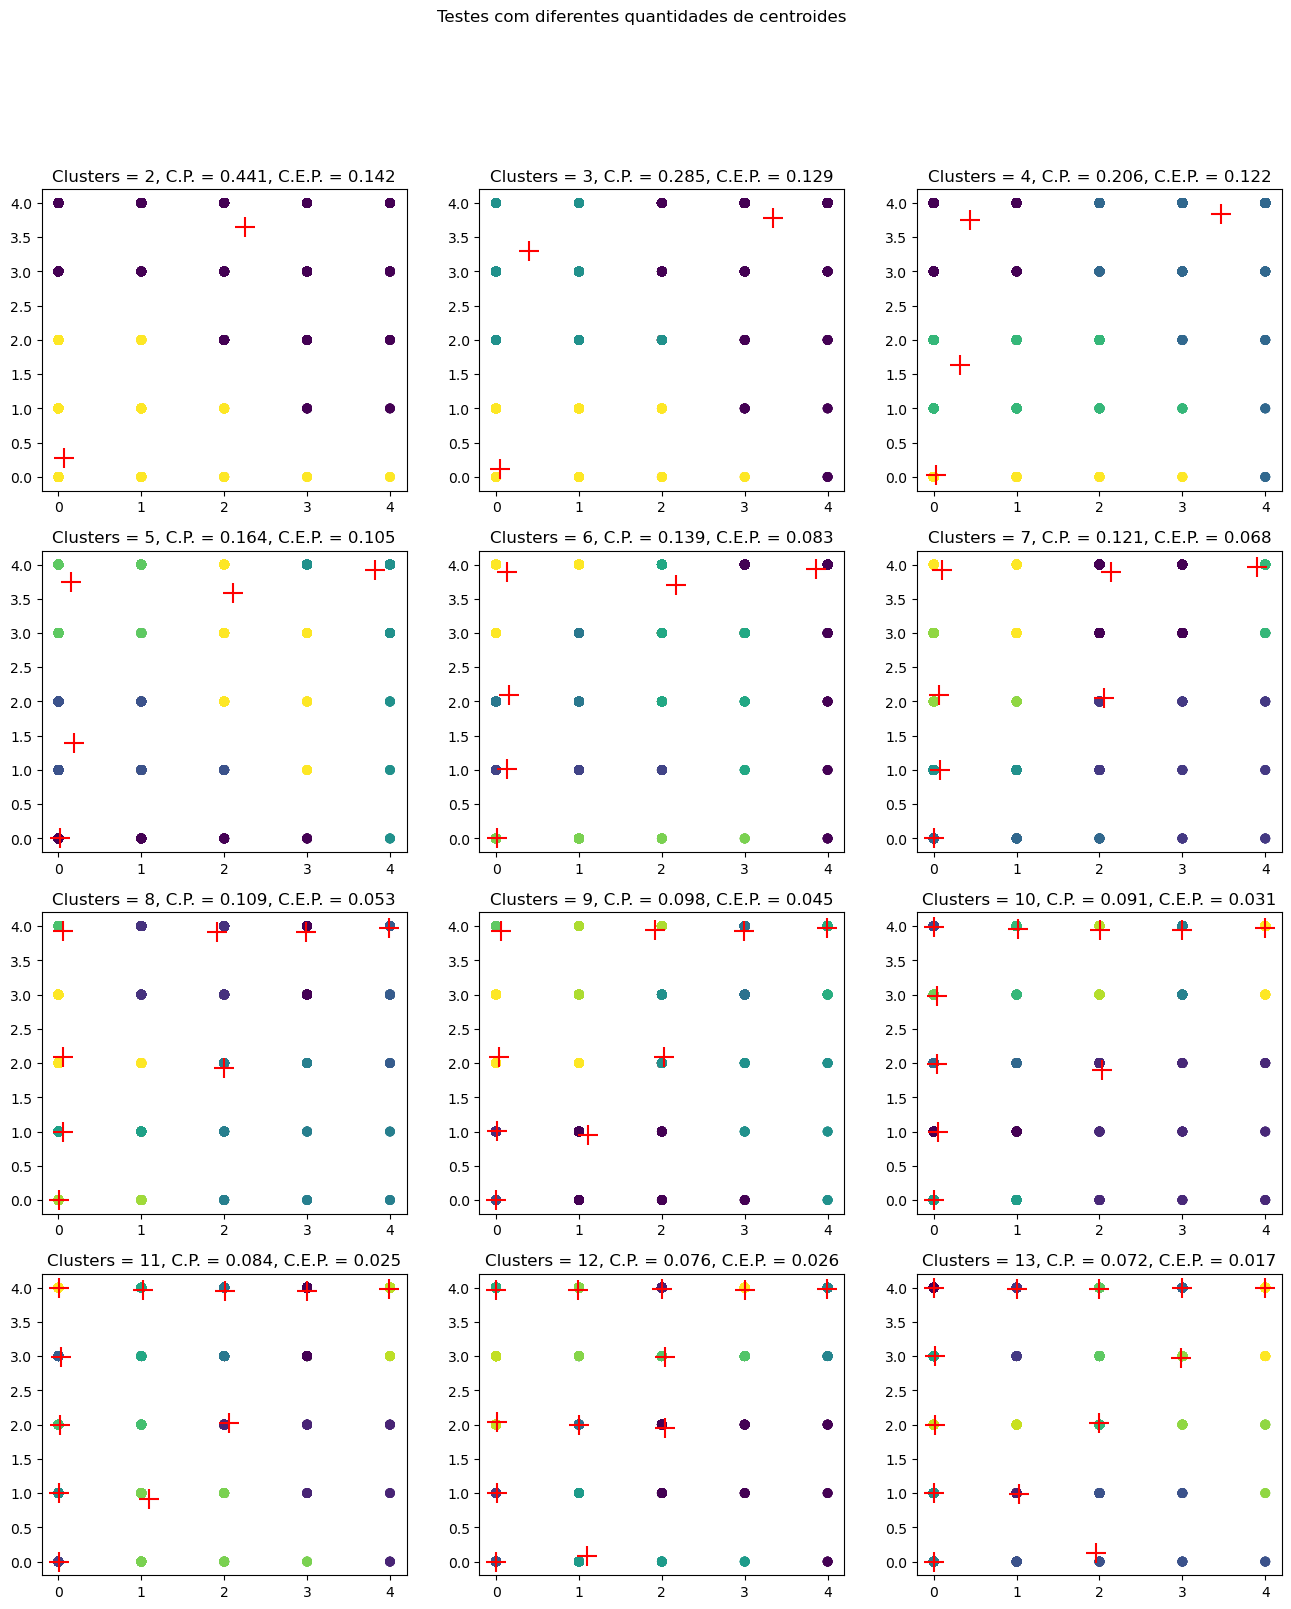

In [53]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "euclidean",
                  m = 2.0)
    fcmeans.fit(df_funcao_renal.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_funcao_renal.values)
    
    eixo.scatter(df_funcao_renal.values[:,0], df_funcao_renal.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

No gráfico acima o melhor resultado é o de 2 centroides, com C.P. = 0.441 e C.E.P. = 0.142.

/home/igorsantana/anaconda3/envs/.petca-venv/lib/python3.12/site-packages/fcmeans/main.py:172: RuntimeWarning: invalid value encountered in divide
  return np.dot(A, B.T) / (p1*p2)


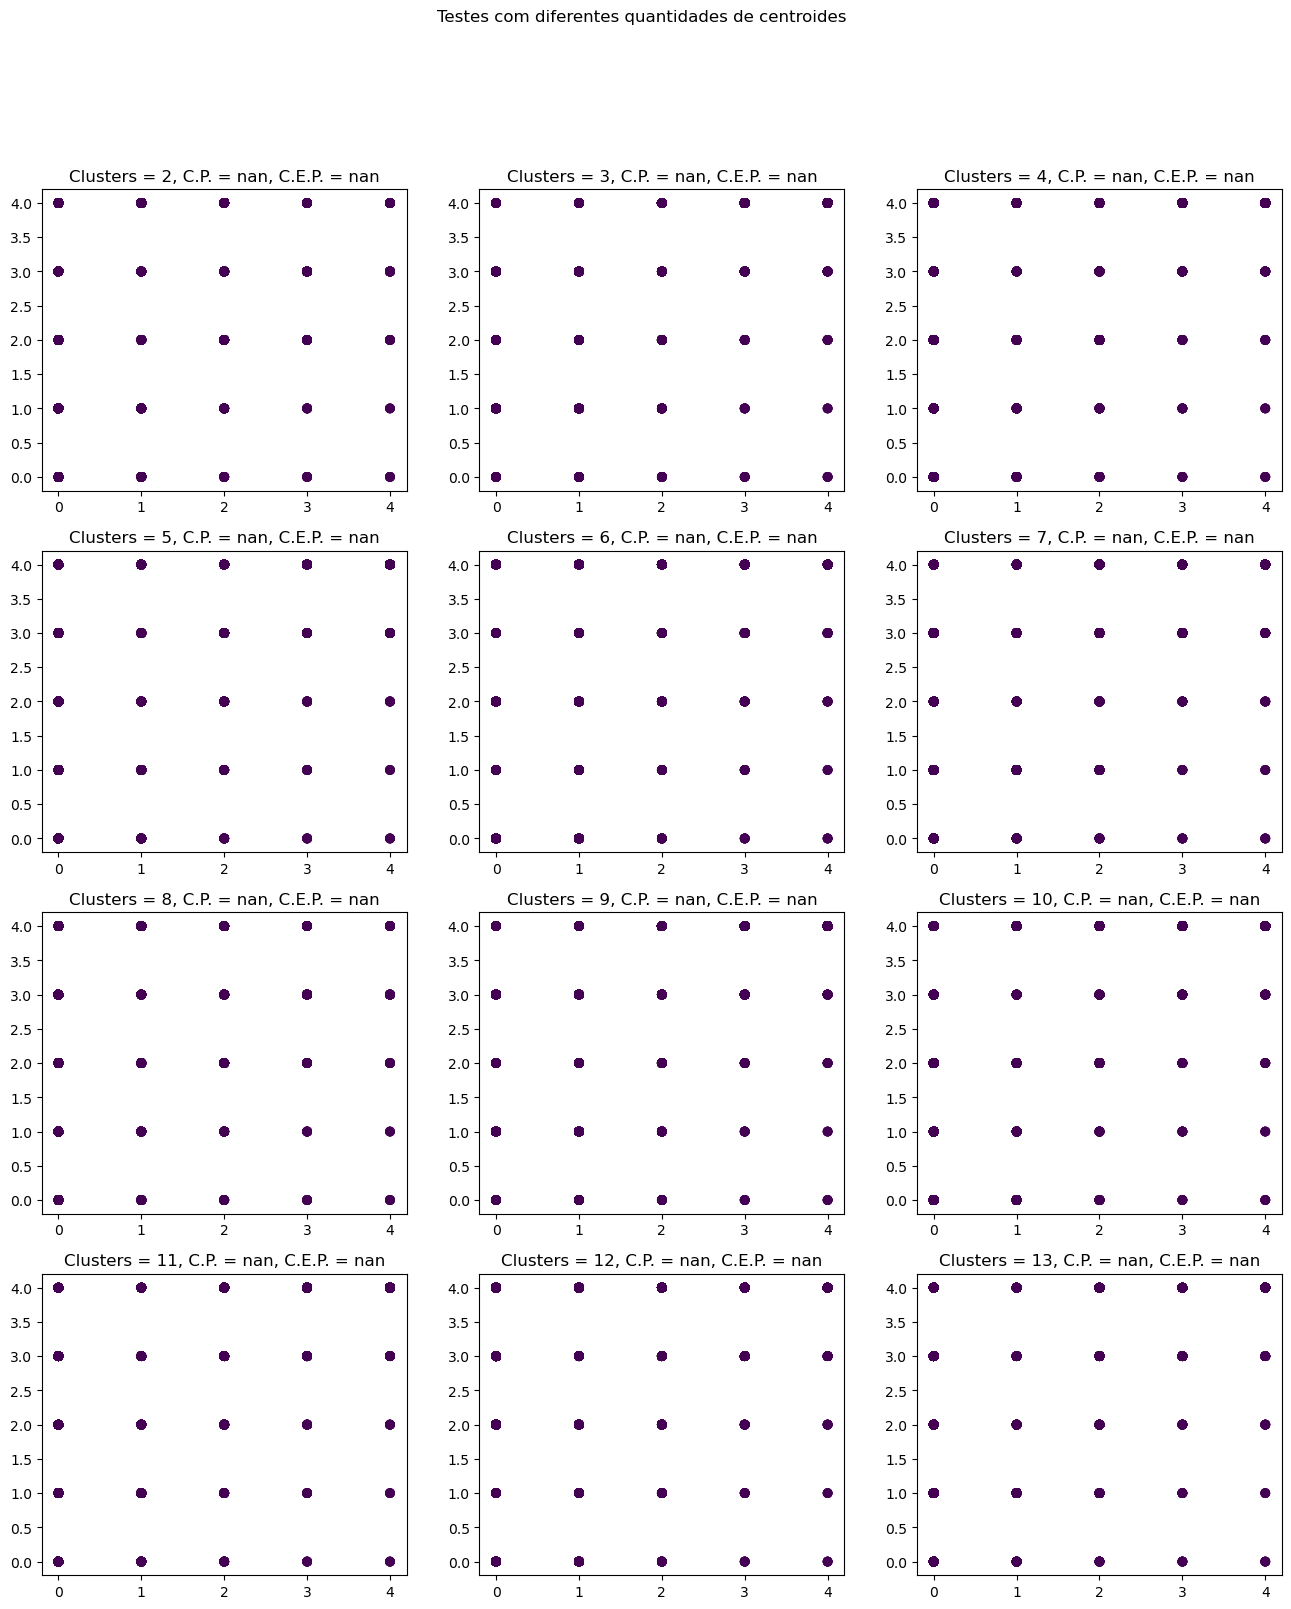

In [54]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "cosine",
                  m = 2.0)
    fcmeans.fit(df_funcao_renal.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_funcao_renal.values)
    
    eixo.scatter(df_funcao_renal.values[:,0], df_funcao_renal.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

No gráfico acima ocorre erro de divisão logo no começo das iterações. Isso não permite que nenhum gráfico seja impresso.

/home/igorsantana/anaconda3/envs/.petca-venv/lib/python3.12/site-packages/fcmeans/main.py:102: RuntimeWarning: divide by zero encountered in divide
  lambda data, col: (data[:, col] / data.T).sum(0)
/home/igorsantana/anaconda3/envs/.petca-venv/lib/python3.12/site-packages/fcmeans/main.py:102: RuntimeWarning: invalid value encountered in divide
  lambda data, col: (data[:, col] / data.T).sum(0)


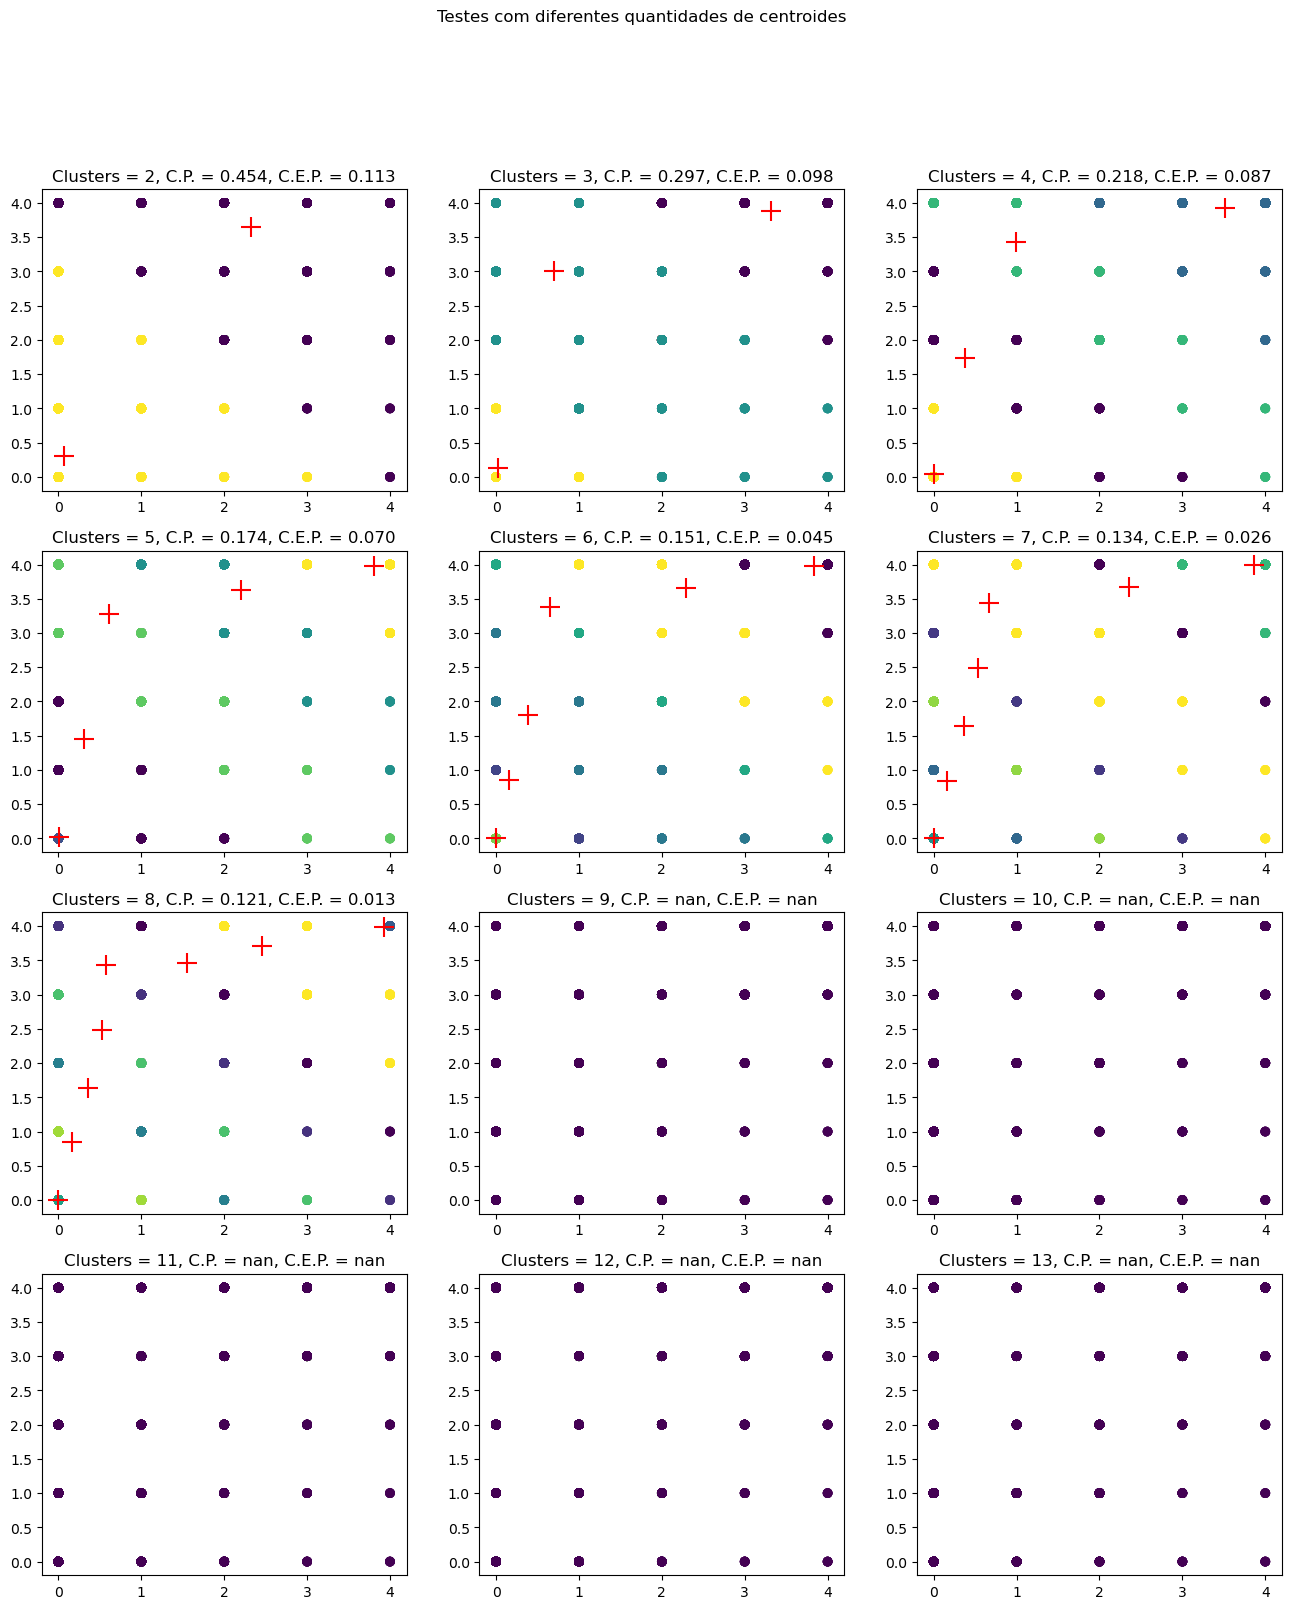

In [55]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "minkowski",
                  m = 2.0,
                  distance_params = {"p": 1.0})
    fcmeans.fit(df_funcao_renal.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_funcao_renal.values)
    
    eixo.scatter(df_funcao_renal.values[:,0], df_funcao_renal.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

No gráfico acima o melhor resultado é o de 2 centroides, com C.P. = 0.454 e C.E.P. = 0.113. No entanto, a partir de 9 centróides ocorre erro de divisão, o que impede a impressão dos resultados com outras quantidades de núcleos.

/home/igorsantana/anaconda3/envs/.petca-venv/lib/python3.12/site-packages/fcmeans/main.py:94: RuntimeWarning: invalid value encountered in power
  temp = FCM._dist(


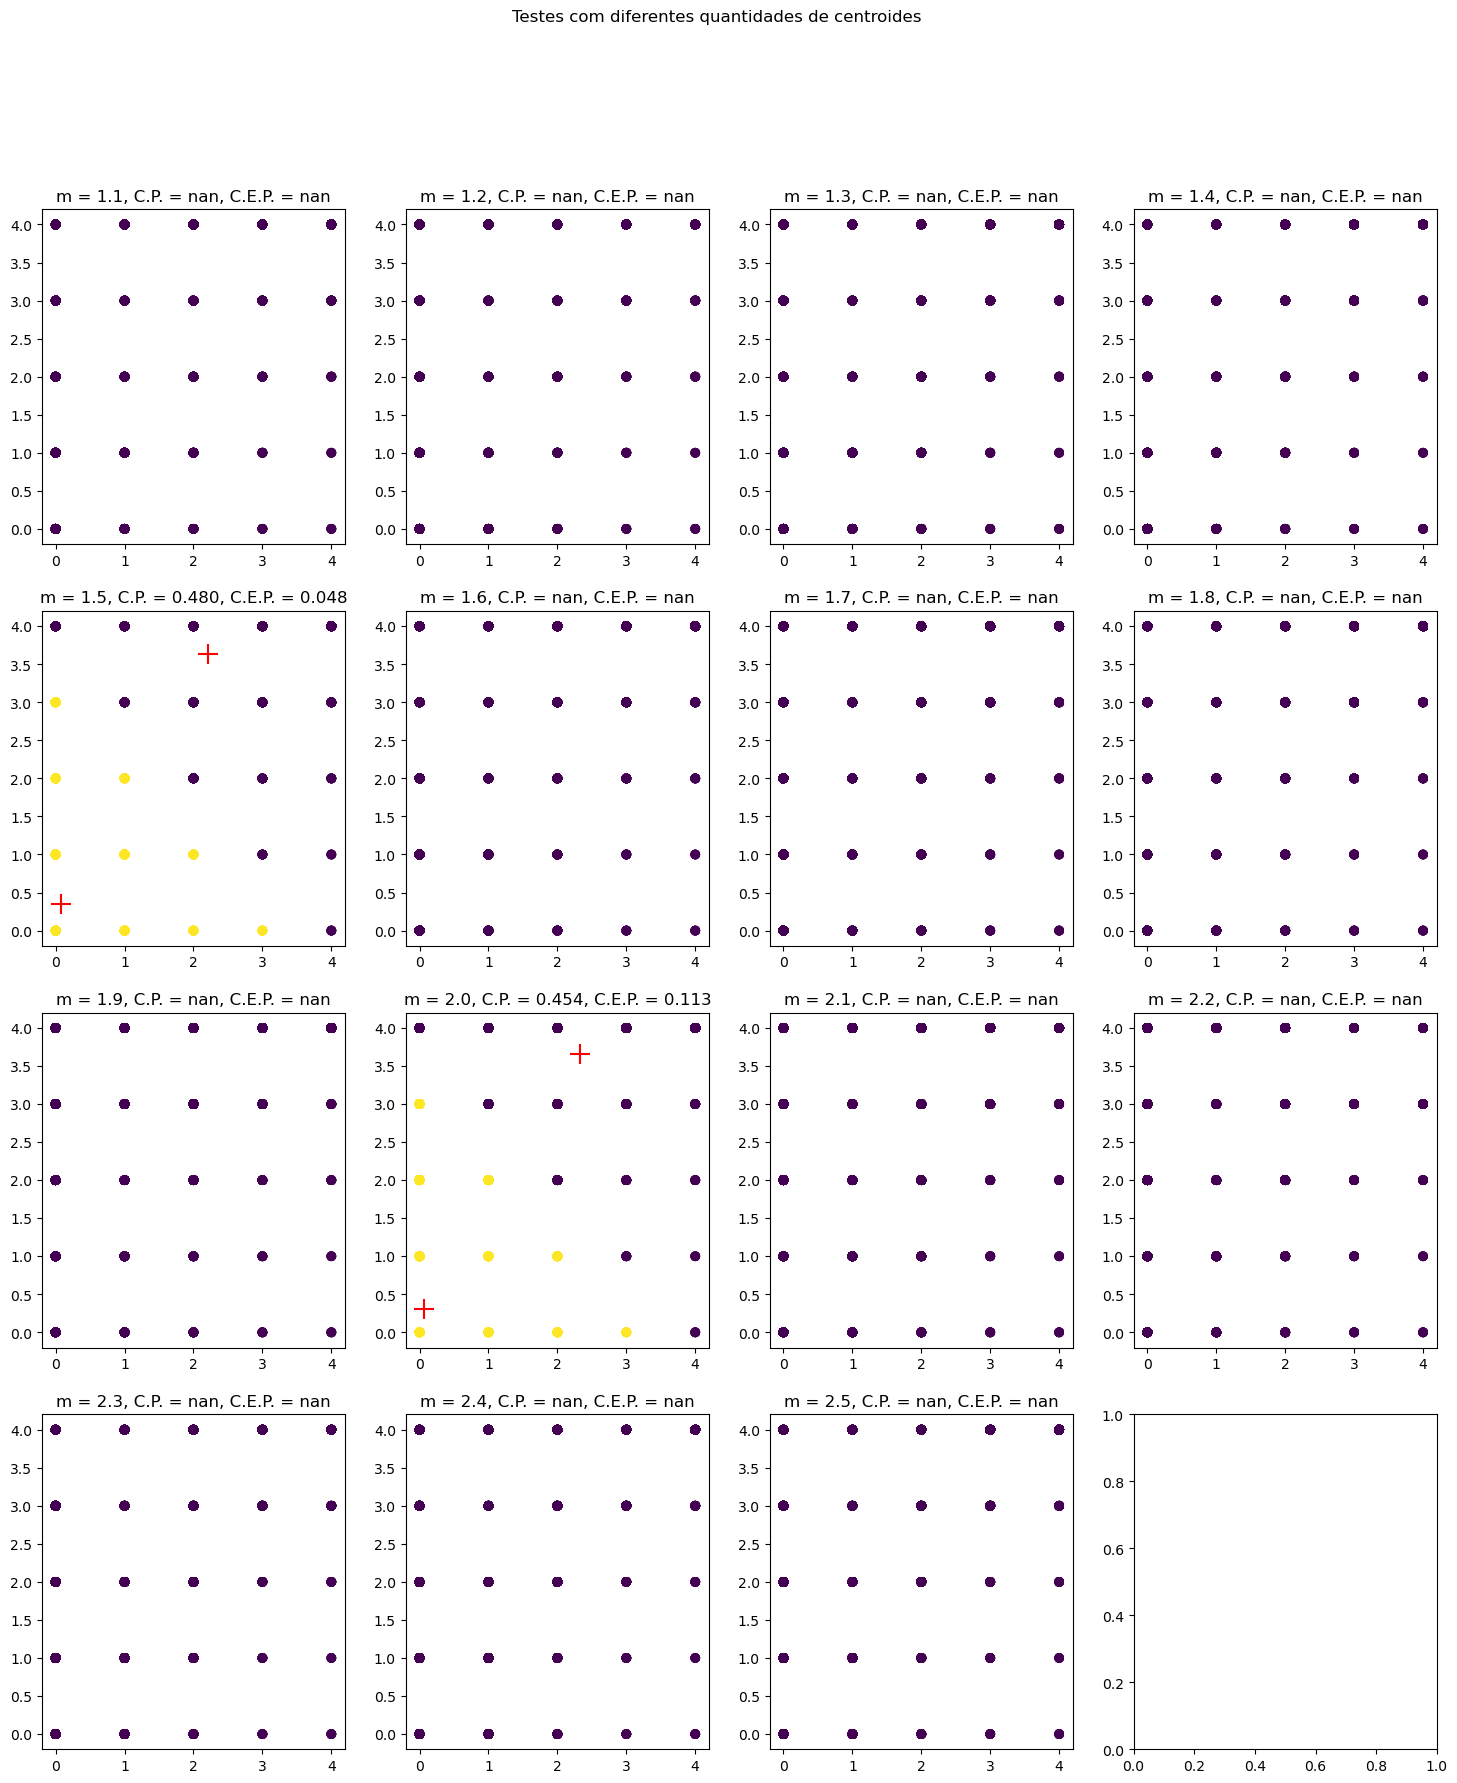

In [56]:
lista_parametros_fuzzy = [round(i, 1) for i in np.arange(1.1, 2.6, 0.1)]
modelos = []

for parametro_fuzzy in lista_parametros_fuzzy:
    fcmeans = FCM(n_clusters = 2,
                  random_state = 42,
                  max_iter = 500,
                  distance = "minkowski",
                  m = parametro_fuzzy,
                  distance_params = {"p": 1.0})
    fcmeans.fit(df_funcao_renal.values)
    modelos.append(fcmeans)
    
qtd_parametro_fuzzy = len(lista_parametros_fuzzy)
linhas = int(np.ceil(np.sqrt(qtd_parametro_fuzzy)))
colunas = int(np.ceil(qtd_parametro_fuzzy / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (18, 20))

for parametro_fuzzy, modelo, eixo in zip(lista_parametros_fuzzy, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_funcao_renal.values)
    
    eixo.scatter(df_funcao_renal.values[:,0], df_funcao_renal.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"m = {parametro_fuzzy}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

Como podemos vez acima, o melhor parâmetro fuzzy é `m = 1.5`, com com C.P. = 0.480 e C.E.P. = 0.048.

### DATASET Dieta Grupos

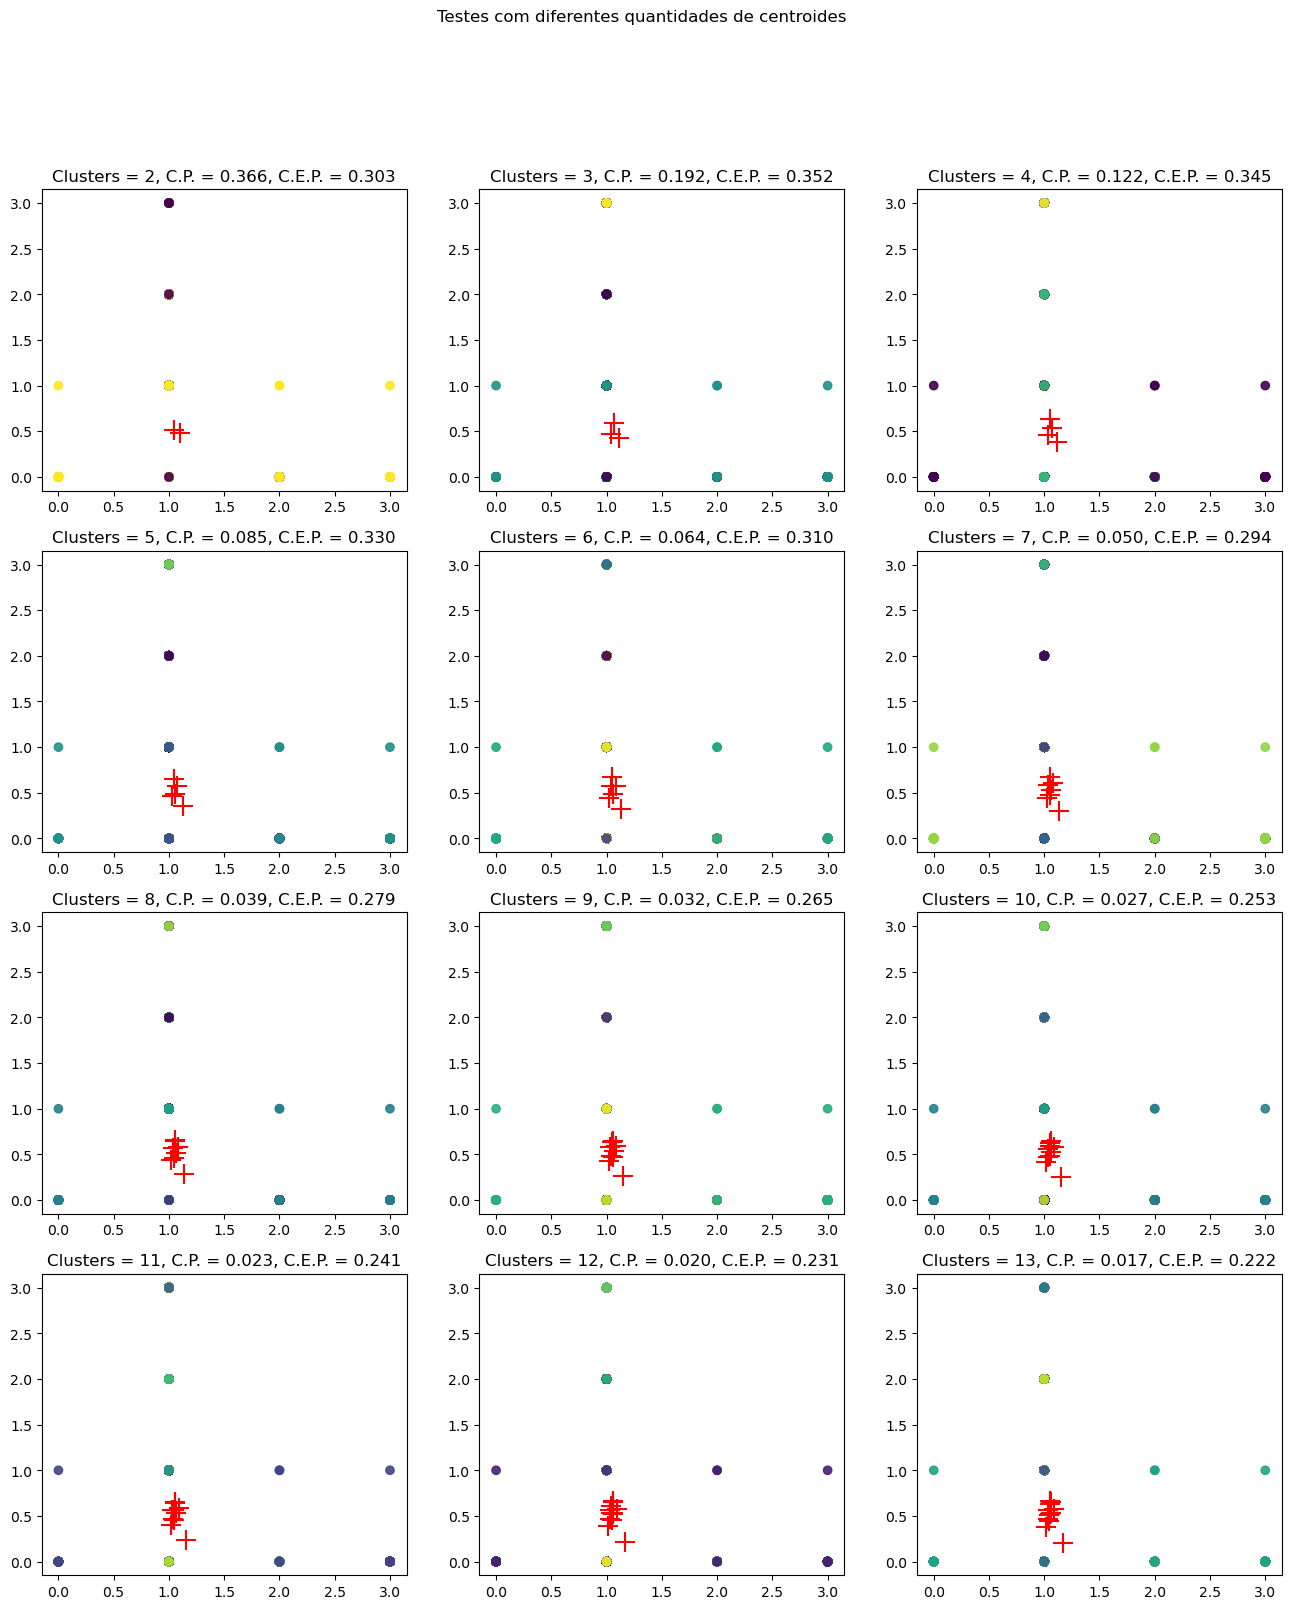

In [57]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "euclidean",
                  m = 2.0)
    fcmeans.fit(df_dieta_grupos.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_dieta_grupos.values)
    
    eixo.scatter(df_dieta_grupos.values[:,0], df_dieta_grupos.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

No gráfico acima o melhor resultado é o de 2 centroides, com C.P. = 0.336 e C.E.P. = 0.303.

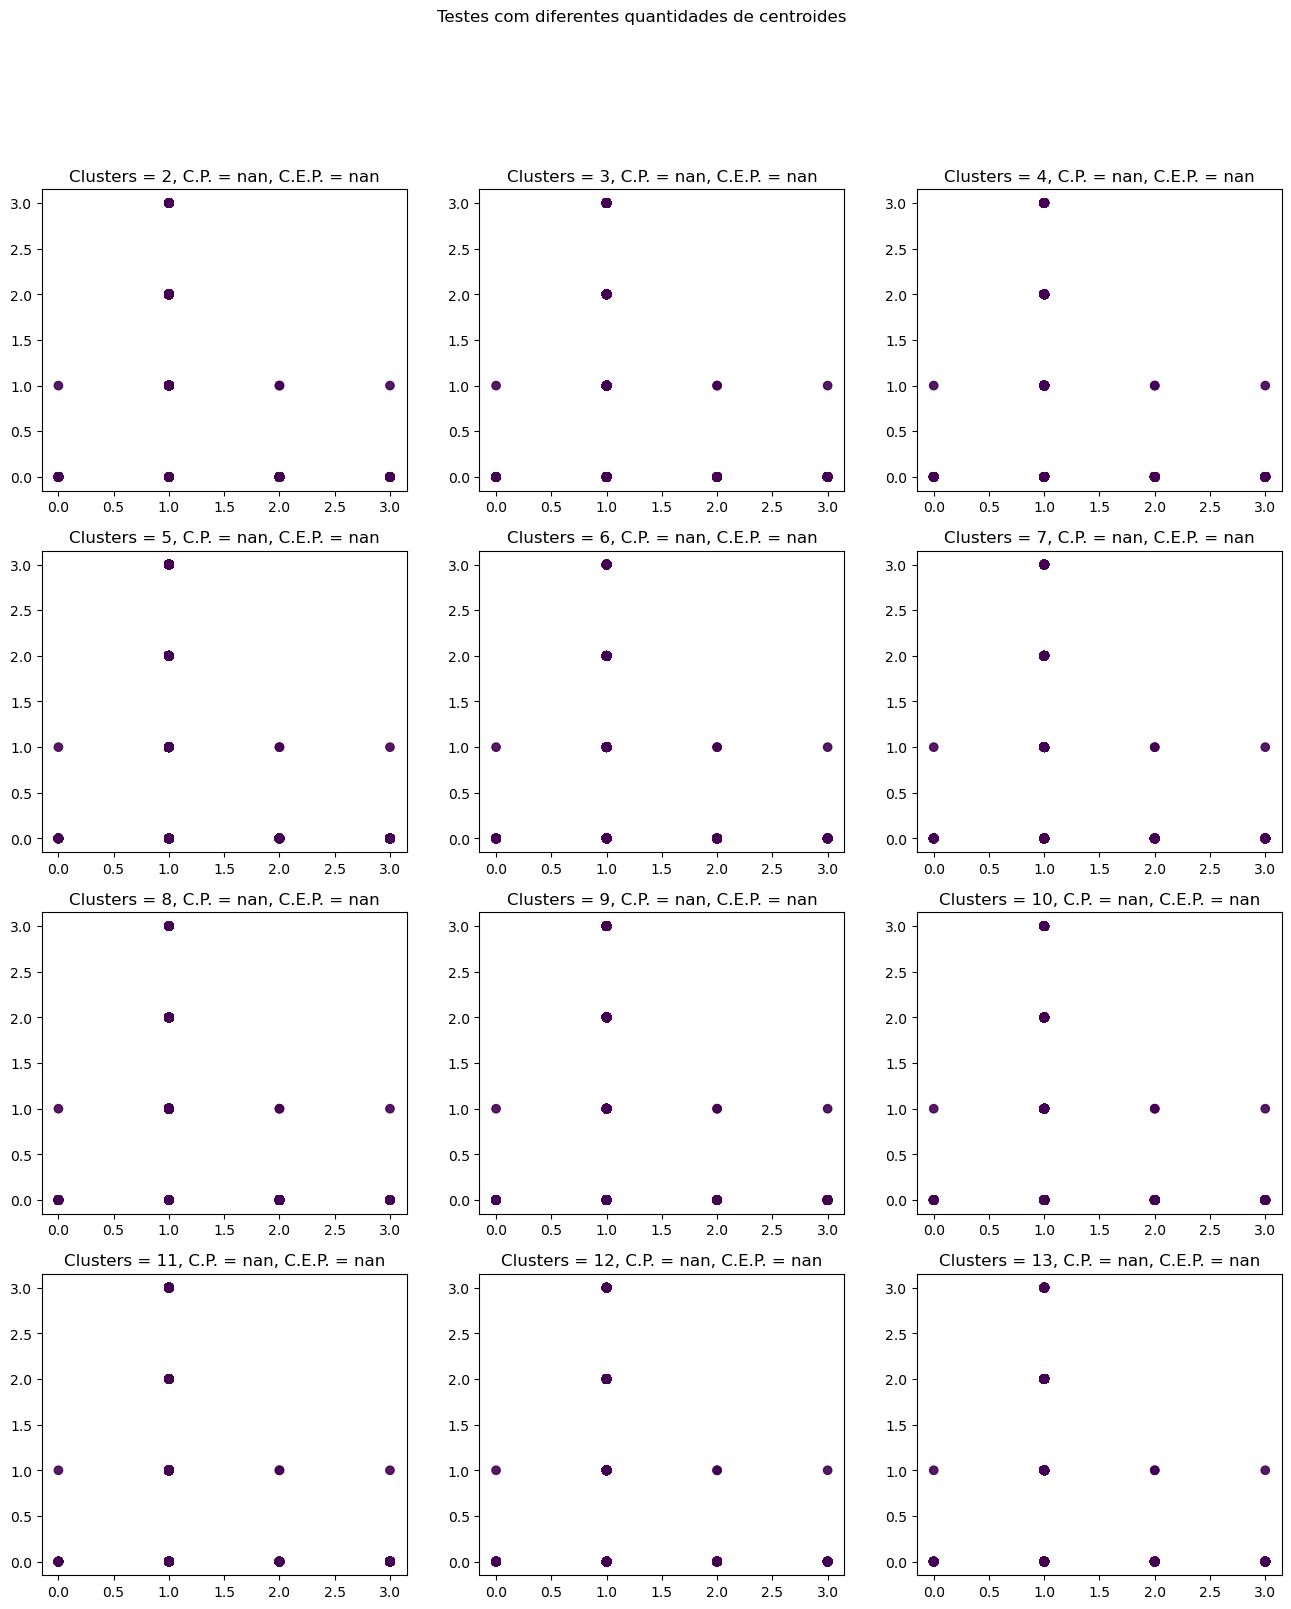

In [58]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "cosine",
                  m = 2.0)
    fcmeans.fit(df_dieta_grupos.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_dieta_grupos.values)
    
    eixo.scatter(df_dieta_grupos.values[:,0], df_dieta_grupos.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

No gráfico acima ocorre erro de divisão logo no começo das iterações. Isso não permite que nenhum gráfico seja impresso.

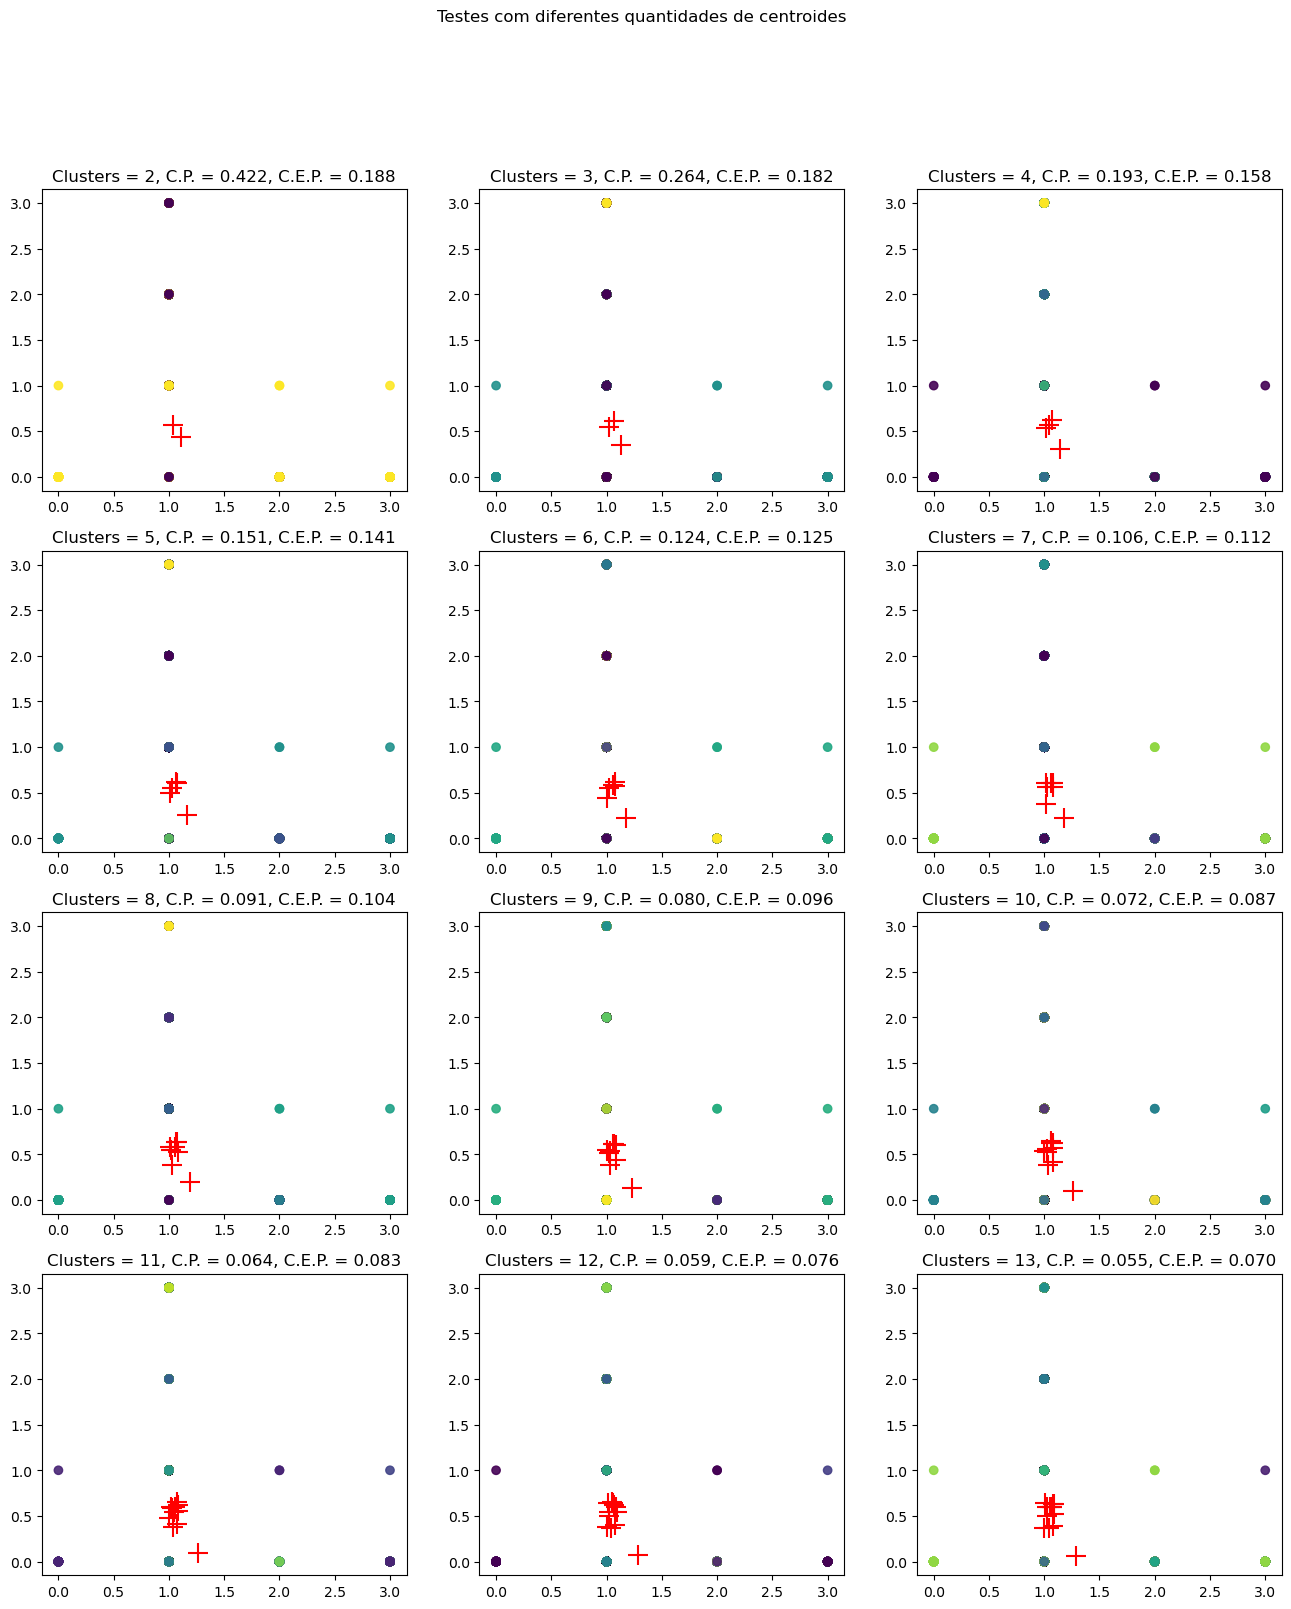

In [59]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "minkowski",
                  m = 2.0,
                  distance_params = {"p": 1.0})
    fcmeans.fit(df_dieta_grupos.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_dieta_grupos.values)
    
    eixo.scatter(df_dieta_grupos.values[:,0], df_dieta_grupos.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

No gráfico acima o melhor resultado é o de 2 centroides, com C.P. = 0.422 e C.E.P. = 0.188.

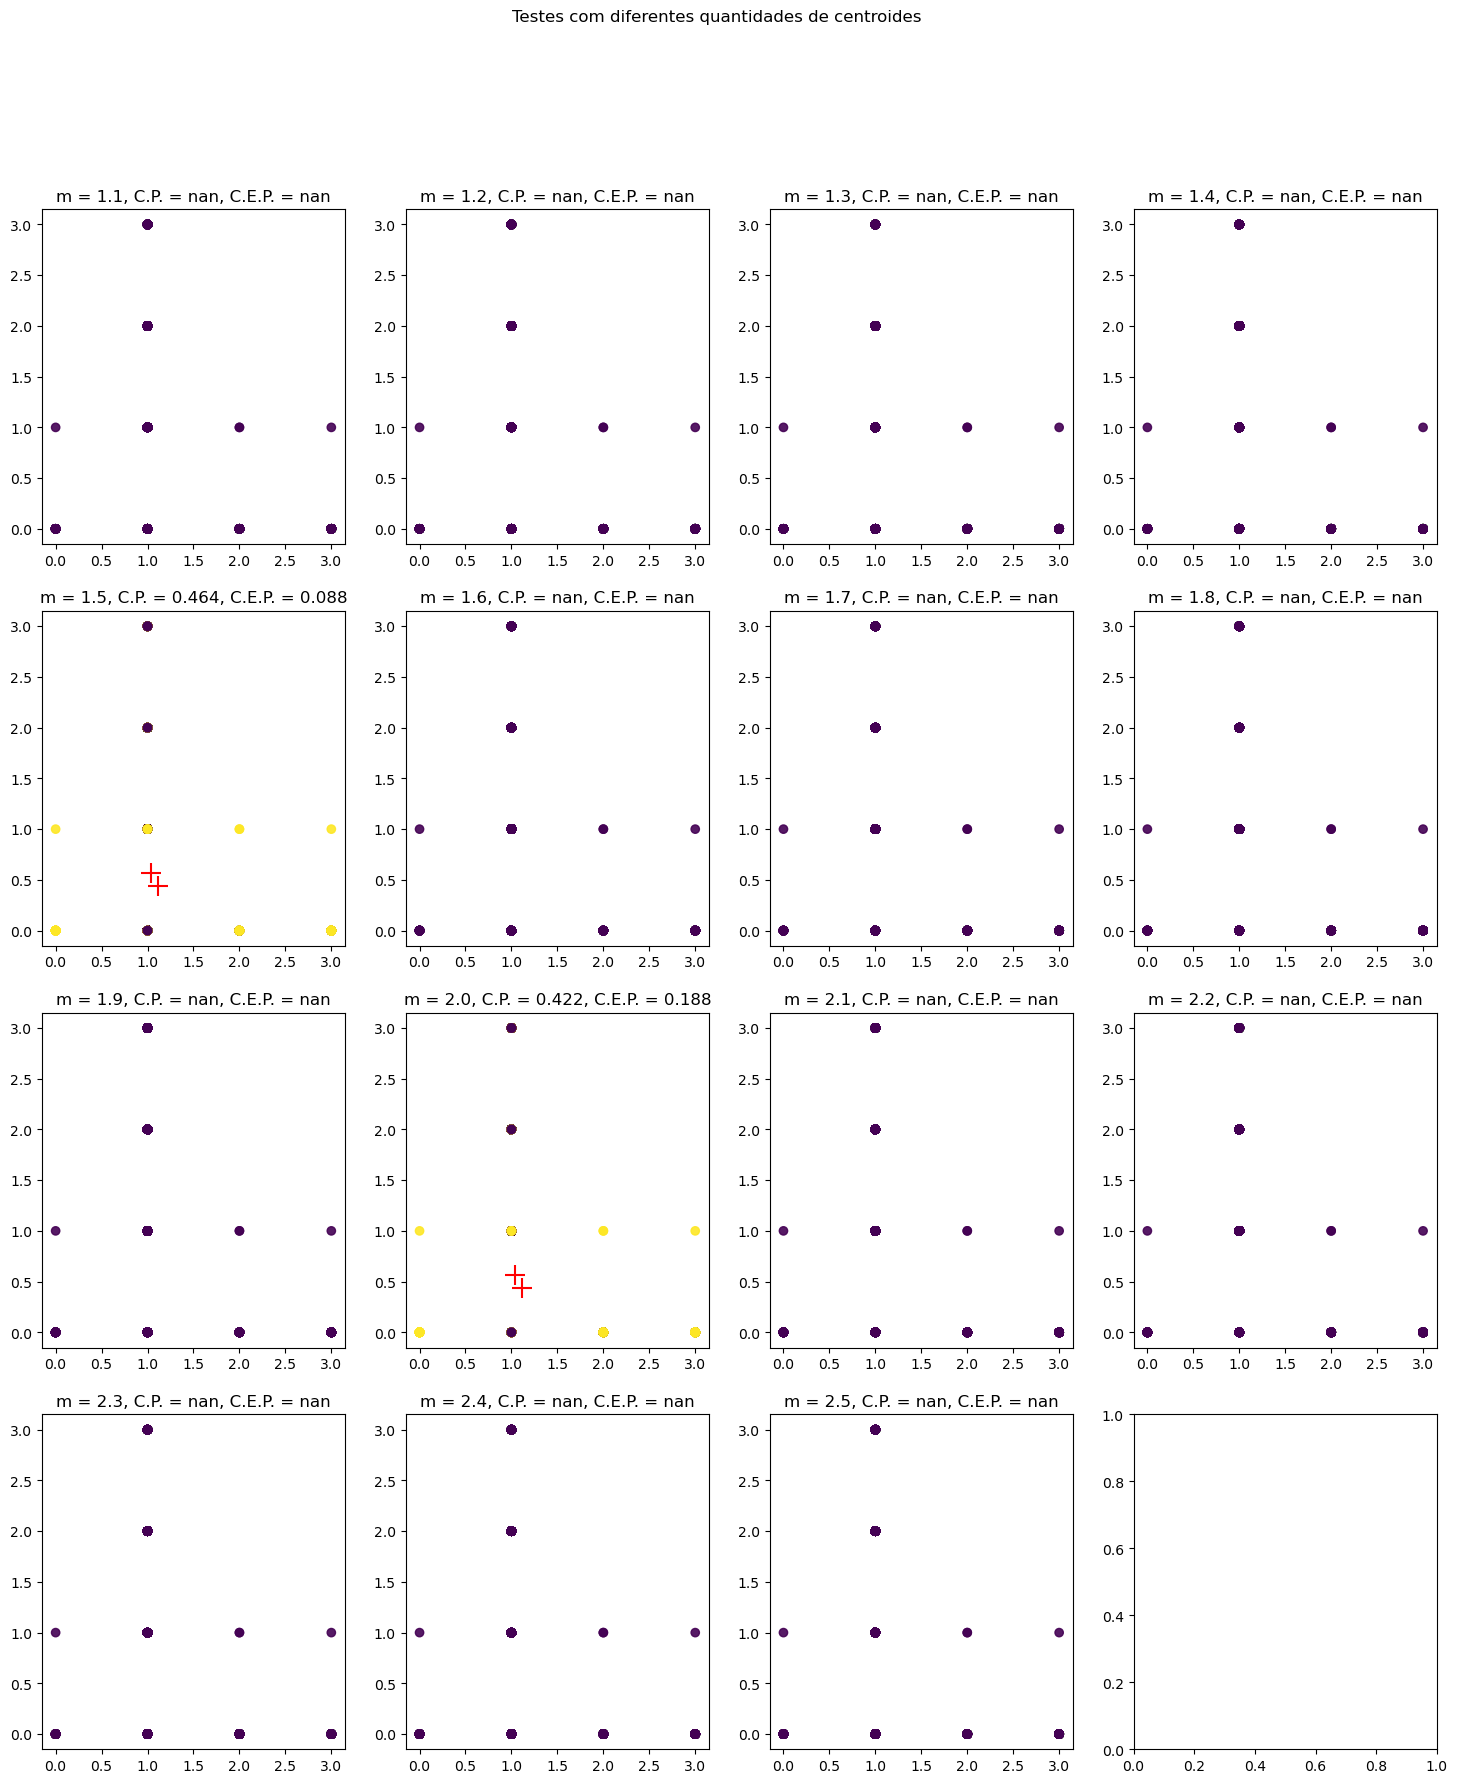

In [60]:
lista_parametros_fuzzy = [round(i, 1) for i in np.arange(1.1, 2.6, 0.1)]
modelos = []

for parametro_fuzzy in lista_parametros_fuzzy:
    fcmeans = FCM(n_clusters = 2,
                  random_state = 42,
                  max_iter = 500,
                  distance = "minkowski",
                  m = parametro_fuzzy,
                  distance_params = {"p": 1.0})
    fcmeans.fit(df_dieta_grupos.values)
    modelos.append(fcmeans)
    
qtd_parametro_fuzzy = len(lista_parametros_fuzzy)
linhas = int(np.ceil(np.sqrt(qtd_parametro_fuzzy)))
colunas = int(np.ceil(qtd_parametro_fuzzy / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (18, 20))

for parametro_fuzzy, modelo, eixo in zip(lista_parametros_fuzzy, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_dieta_grupos.values)
    
    eixo.scatter(df_dieta_grupos.values[:,0], df_dieta_grupos.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"m = {parametro_fuzzy}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

Como podemos vez acima, o melhor parâmetro fuzzy é `m = 1.5`, com com C.P. = 0.464 e C.E.P. = 0.088.

### DATASET Perfil Hepatico

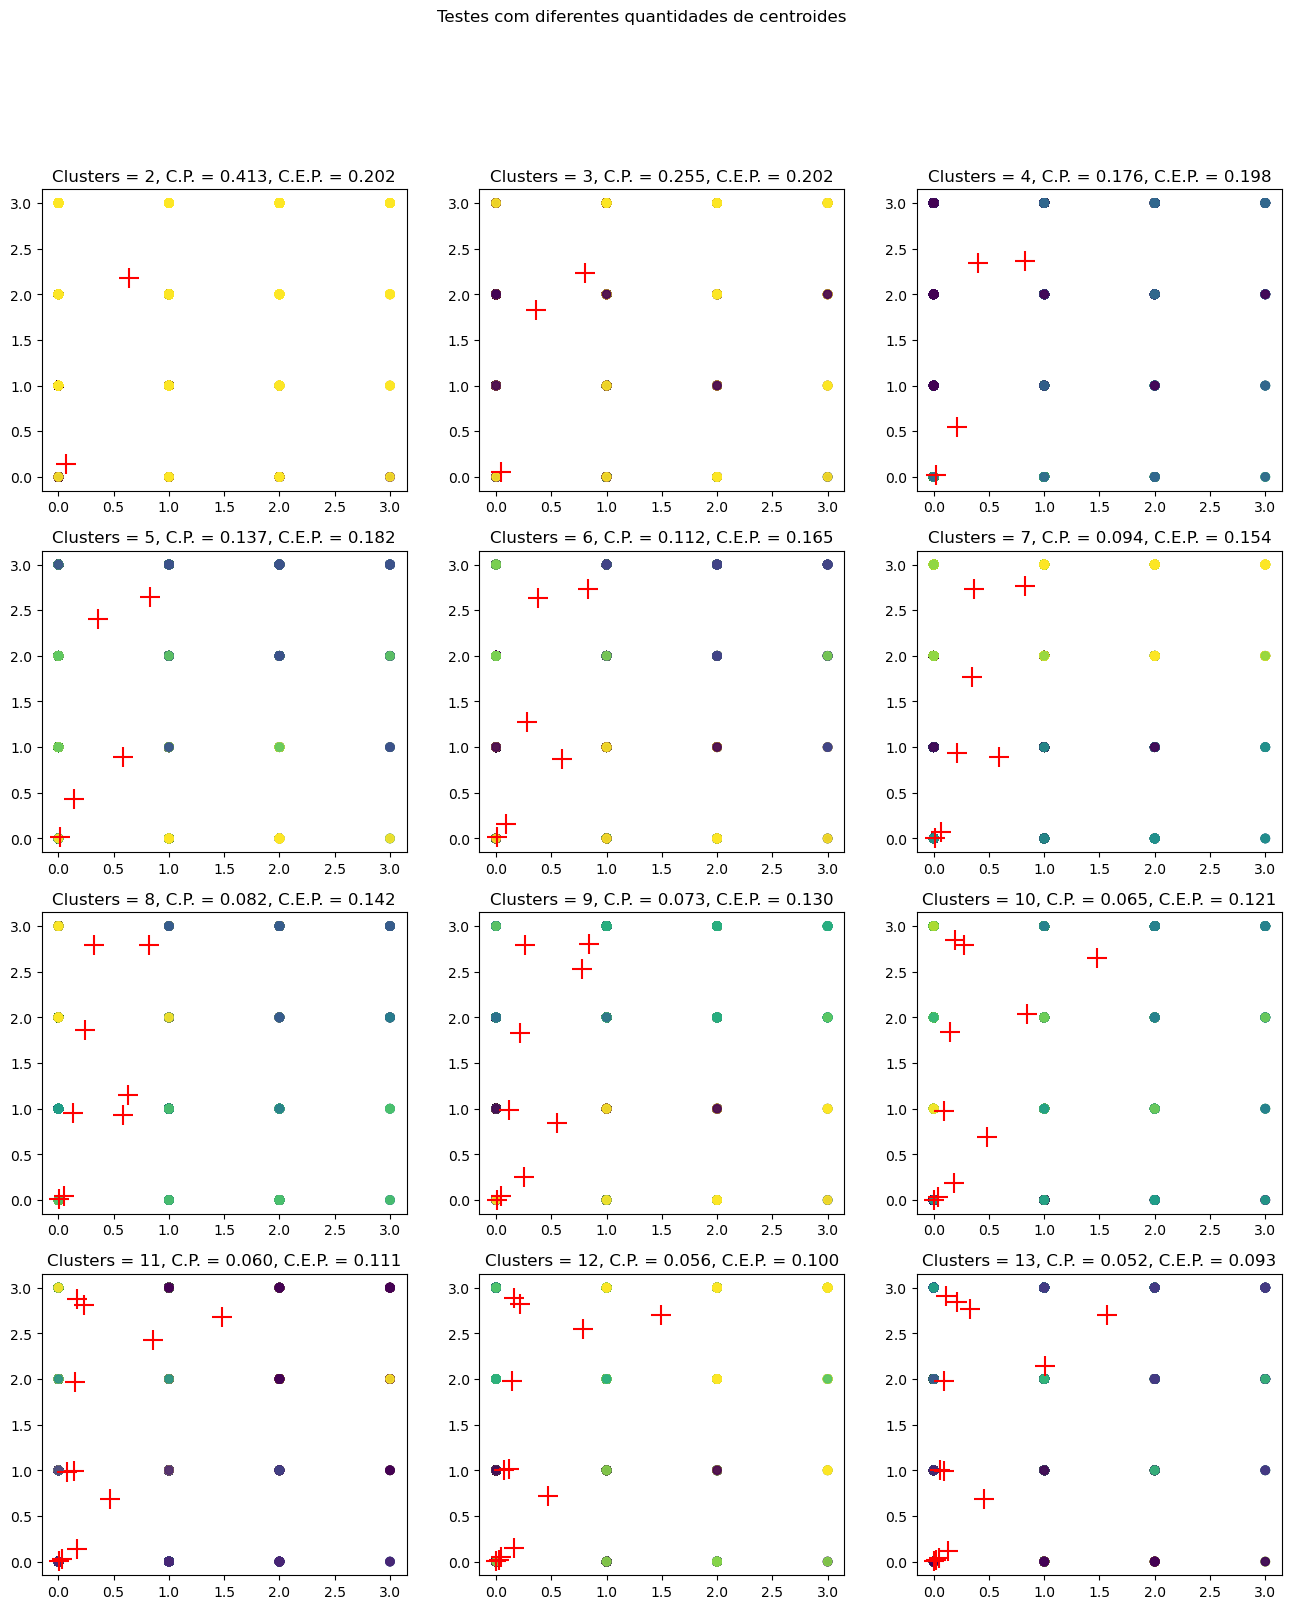

In [61]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "euclidean",
                  m = 2.0)
    fcmeans.fit(df_perfil_hepatico.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_perfil_hepatico.values)
    
    eixo.scatter(df_perfil_hepatico.values[:,0], df_perfil_hepatico.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

No gráfico acima o melhor resultado é o de 2 centroides, com C.P. = 0.413 e C.E.P. = 0.202.

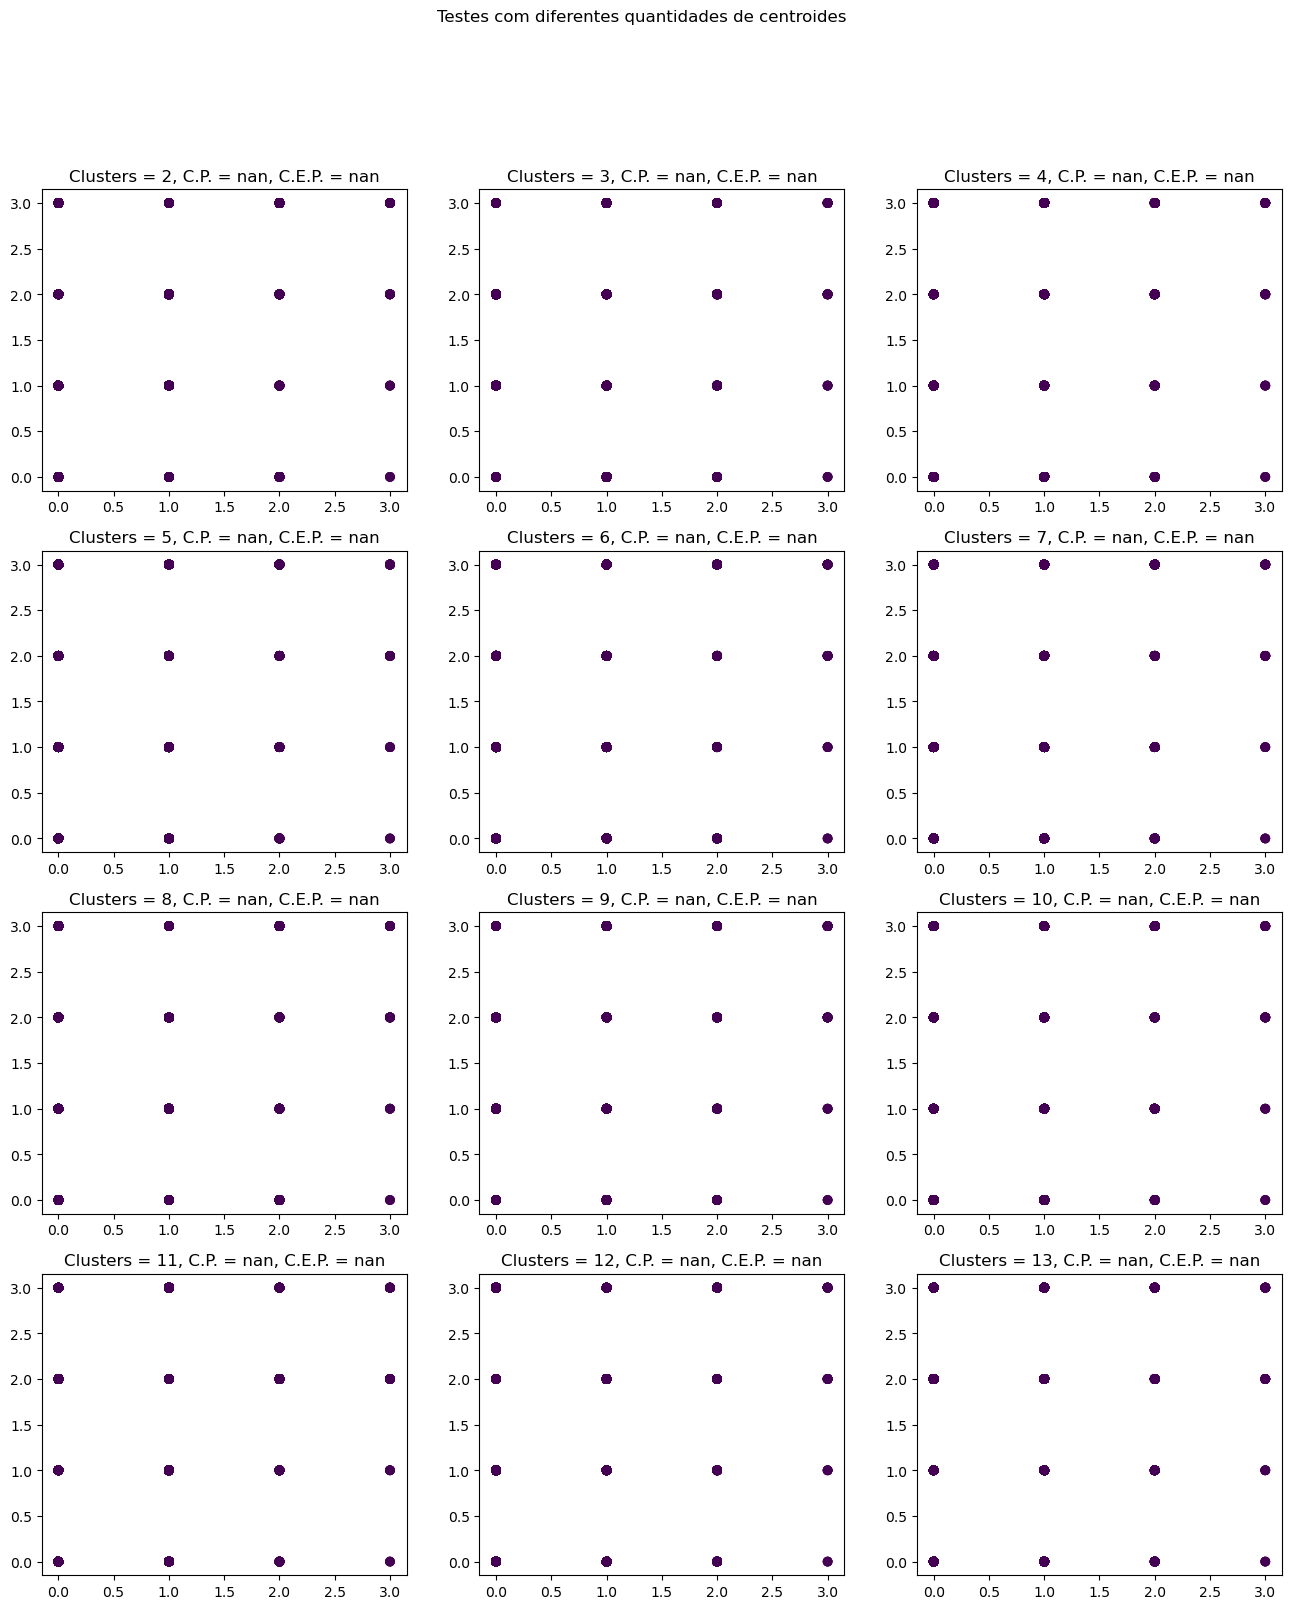

In [62]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "cosine",
                  m = 2.0)
    fcmeans.fit(df_perfil_hepatico.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_perfil_hepatico.values)
    
    eixo.scatter(df_perfil_hepatico.values[:,0], df_perfil_hepatico.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

No gráfico acima ocorre erro de divisão logo no começo das iterações. Isso não permite que nenhum gráfico seja impresso.

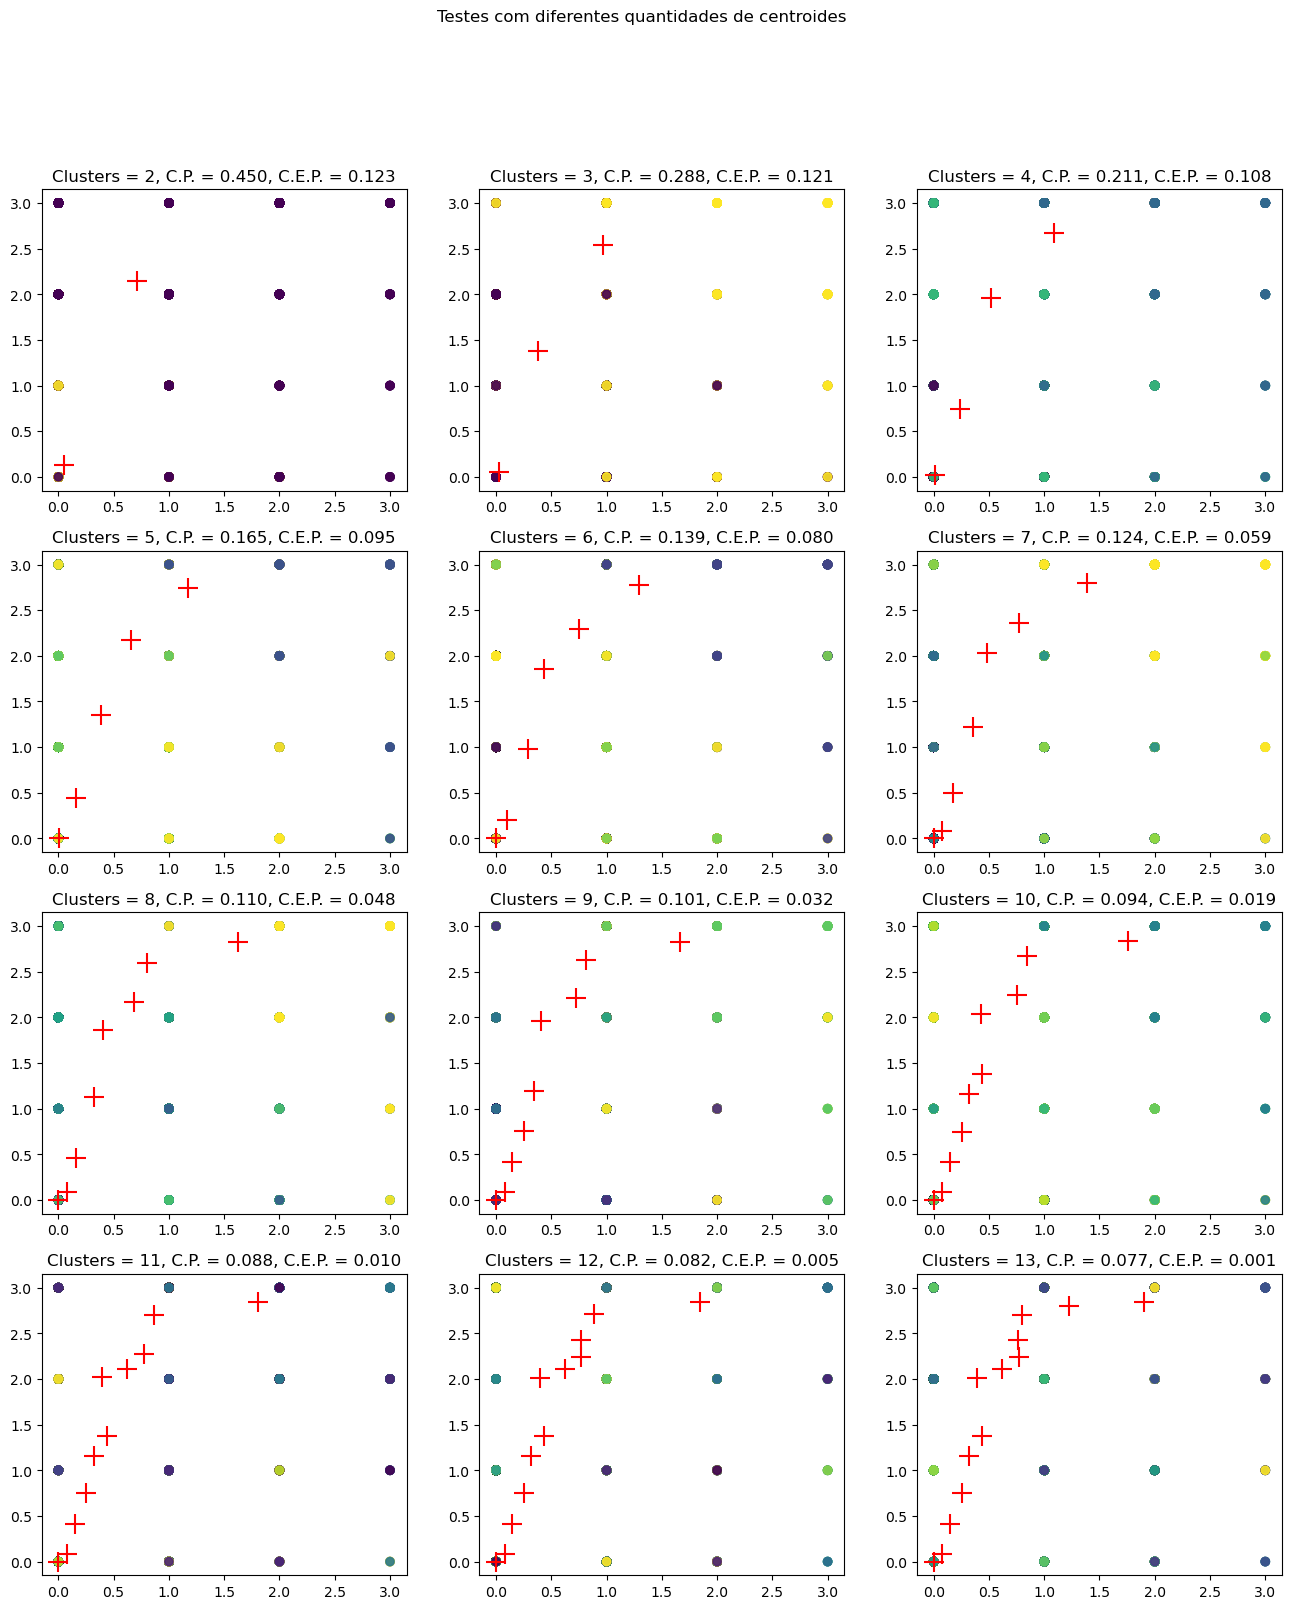

In [63]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "minkowski",
                  m = 2.0,
                  distance_params = {"p": 1.0})
    fcmeans.fit(df_perfil_hepatico.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_perfil_hepatico.values)
    
    eixo.scatter(df_perfil_hepatico.values[:,0], df_perfil_hepatico.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

No gráfico acima o melhor resultado é o de 2 centroides, com C.P. = 0.450 e C.E.P. = 0.123.

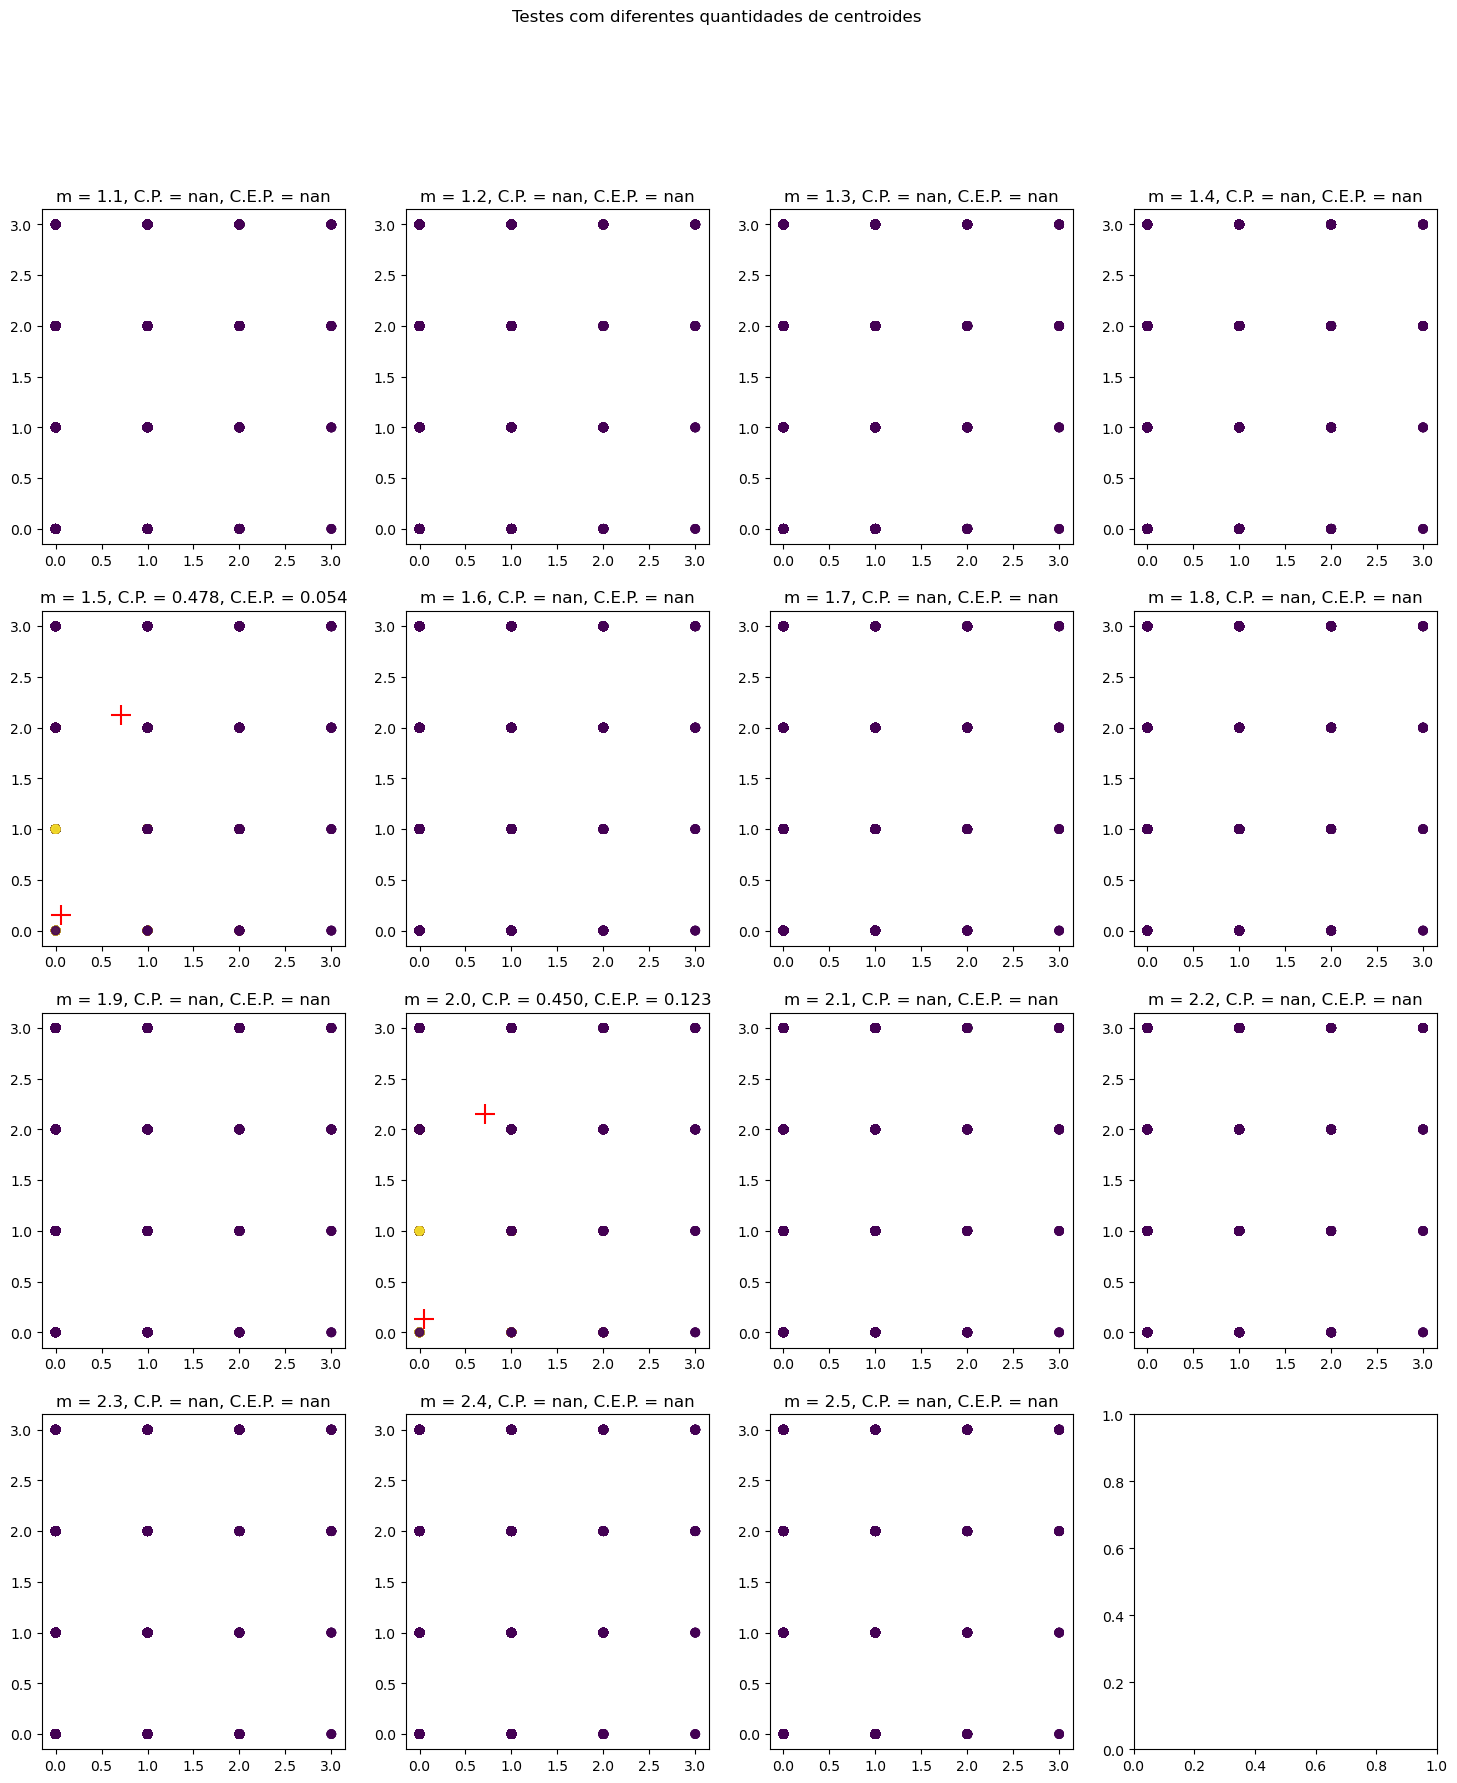

In [64]:
lista_parametros_fuzzy = [round(i, 1) for i in np.arange(1.1, 2.6, 0.1)]
modelos = []

for parametro_fuzzy in lista_parametros_fuzzy:
    fcmeans = FCM(n_clusters = 2,
                  random_state = 42,
                  max_iter = 500,
                  distance = "minkowski",
                  m = parametro_fuzzy,
                  distance_params = {"p": 1.0})
    fcmeans.fit(df_perfil_hepatico.values)
    modelos.append(fcmeans)
    
qtd_parametro_fuzzy = len(lista_parametros_fuzzy)
linhas = int(np.ceil(np.sqrt(qtd_parametro_fuzzy)))
colunas = int(np.ceil(qtd_parametro_fuzzy / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (18, 20))

for parametro_fuzzy, modelo, eixo in zip(lista_parametros_fuzzy, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_perfil_hepatico.values)
    
    eixo.scatter(df_perfil_hepatico.values[:,0], df_perfil_hepatico.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"m = {parametro_fuzzy}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

Como podemos vez acima, o melhor parâmetro fuzzy é `m = 1.5`, com com C.P. = 0.478 e C.E.P. = 0.054.

### DATASET ureia

#### Removendo valores outliers do dataset e os substituindo por `np.nan`

In [5]:
novo_df_ureia_tratado = deletar_valores_absurdos(df_ureia, df_ureia.max().max())
novo_df_ureia_tratado.max()

ureia_dia_1    212.0
ureia_dia_2    162.0
ureia_dia_3    171.0
ureia_dia_4    184.0
ureia_dia_5    182.0
ureia_dia_6    206.0
ureia_dia_7    195.0
dtype: float64

#### Iterando pelo dataset e inserindo dados de dias anteriores em dias posteriores que contém dados nulos

In [6]:
novo_df_ureia_tratado = preencher_valores_faltantes_linha(novo_df_ureia_tratado)
novo_df_ureia_tratado.head(10)

ureia_dia_1  ureia_dia_2  ureia_dia_3  ureia_dia_4  ureia_dia_5  \
subject_id                                                                    
10001884           30.0         30.0         38.0         31.0         26.0   
10004422           21.0         13.0         17.0         16.0         20.0   
10004733           44.0         41.0         39.0         37.0         28.0   
10005606            6.0          6.0         10.0          6.0         11.0   
10010867            8.0          5.0          5.0          5.0          6.0   
10019777           17.0         22.0         16.0         19.0         18.0   
10020944           34.0         28.0         26.0         22.0         21.0   
10023486           42.0         48.0         54.0         63.0         68.0   
10032381            9.0          9.0          9.0         14.0         21.0   
10035747           20.0         16.0         14.0         14.0         19.0   

            ureia_dia_6  ureia_dia_7  
subject_id                            
10001884           22.0         14.0  
10004422           24.0         24.0  
10004733           26.0         28.0  
10005606           11.0         15.0  
10010867            7.0          9.0  
10019777           17.0         16.0  
10020944           20.0         19.0  
10023486           69.0         70.0  
10032381           24.0         26.0  
10035747           19.0         18.0

In [7]:
novo_df_ureia_tratado.isna().sum()

ureia_dia_1    21
ureia_dia_2     2
ureia_dia_3     5
ureia_dia_4     5
ureia_dia_5     7
ureia_dia_6    12
ureia_dia_7    32
dtype: int64

#### Deletando linhas que contém valores nulos - mesmo depois da inserção de dados artificiais

In [8]:
novo_df_ureia_tratado[novo_df_ureia_tratado.isna().any(axis = 1)].index

Index([10344732, 10463546, 10477920, 10553635, 10583686, 10615339, 10996857,
       11542534, 11611745, 11638303, 11663336, 11833476, 12344021, 12374214,
       12606435, 12934260, 13679248, 13681485, 13824877, 13827765, 13911200,
       14363068, 14383658, 14623418, 14691603, 14696918, 14785854, 14816630,
       15090519, 15158294, 15204620, 15409850, 15455733, 15583807, 15640315,
       15763754, 15993533, 16327028, 16832227, 17131210, 17327554, 17484283,
       17635990, 17718694, 17803326, 18135694, 18152377, 18213765, 18560897,
       18638524, 18757959, 18976063, 19392949, 19571102, 19571265, 19694231],
      dtype='int64', name='subject_id')

In [9]:
novo_df_ureia_tratado = novo_df_ureia_tratado.dropna(axis = 0)
novo_df_ureia_tratado.isna().sum().sum()

0

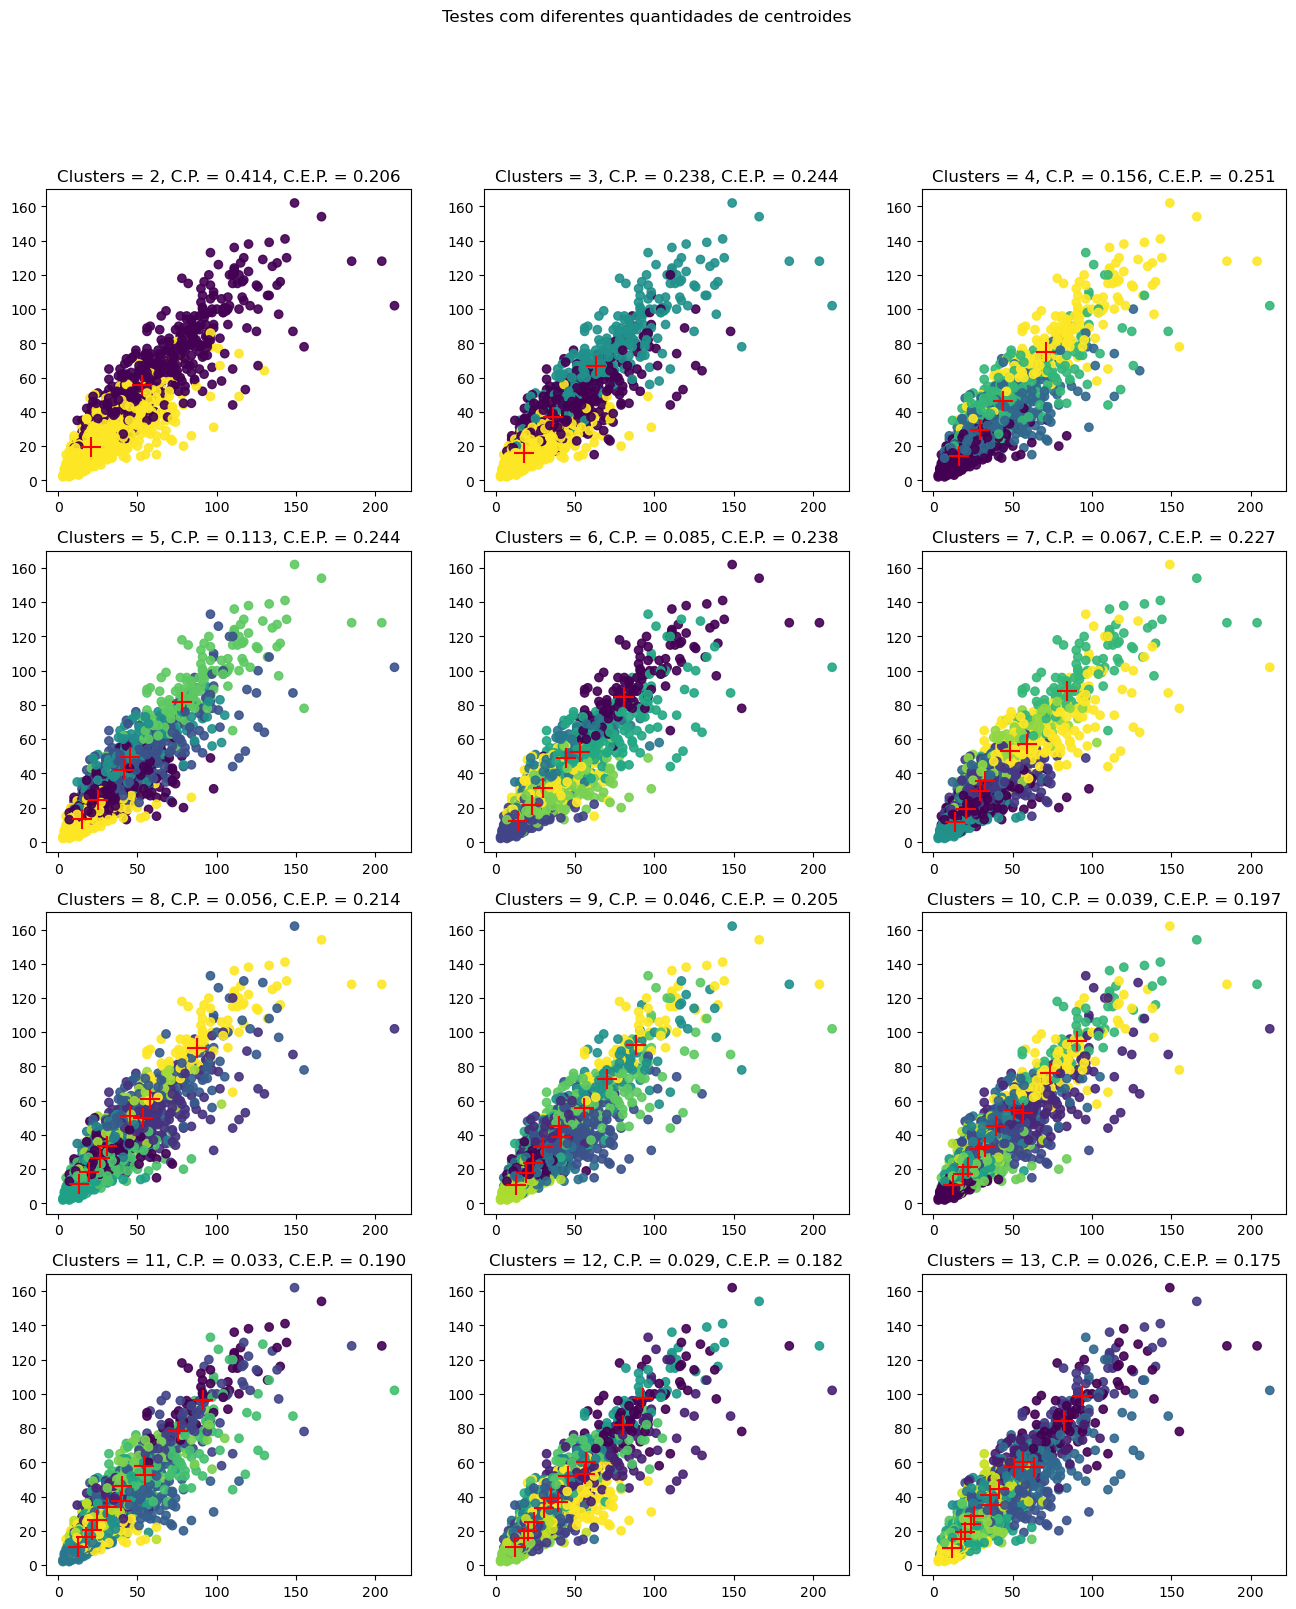

In [10]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "euclidean",
                  m = 2.0)
    fcmeans.fit(novo_df_ureia_tratado.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(novo_df_ureia_tratado.values)
    
    eixo.scatter(novo_df_ureia_tratado.values[:,0], novo_df_ureia_tratado.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

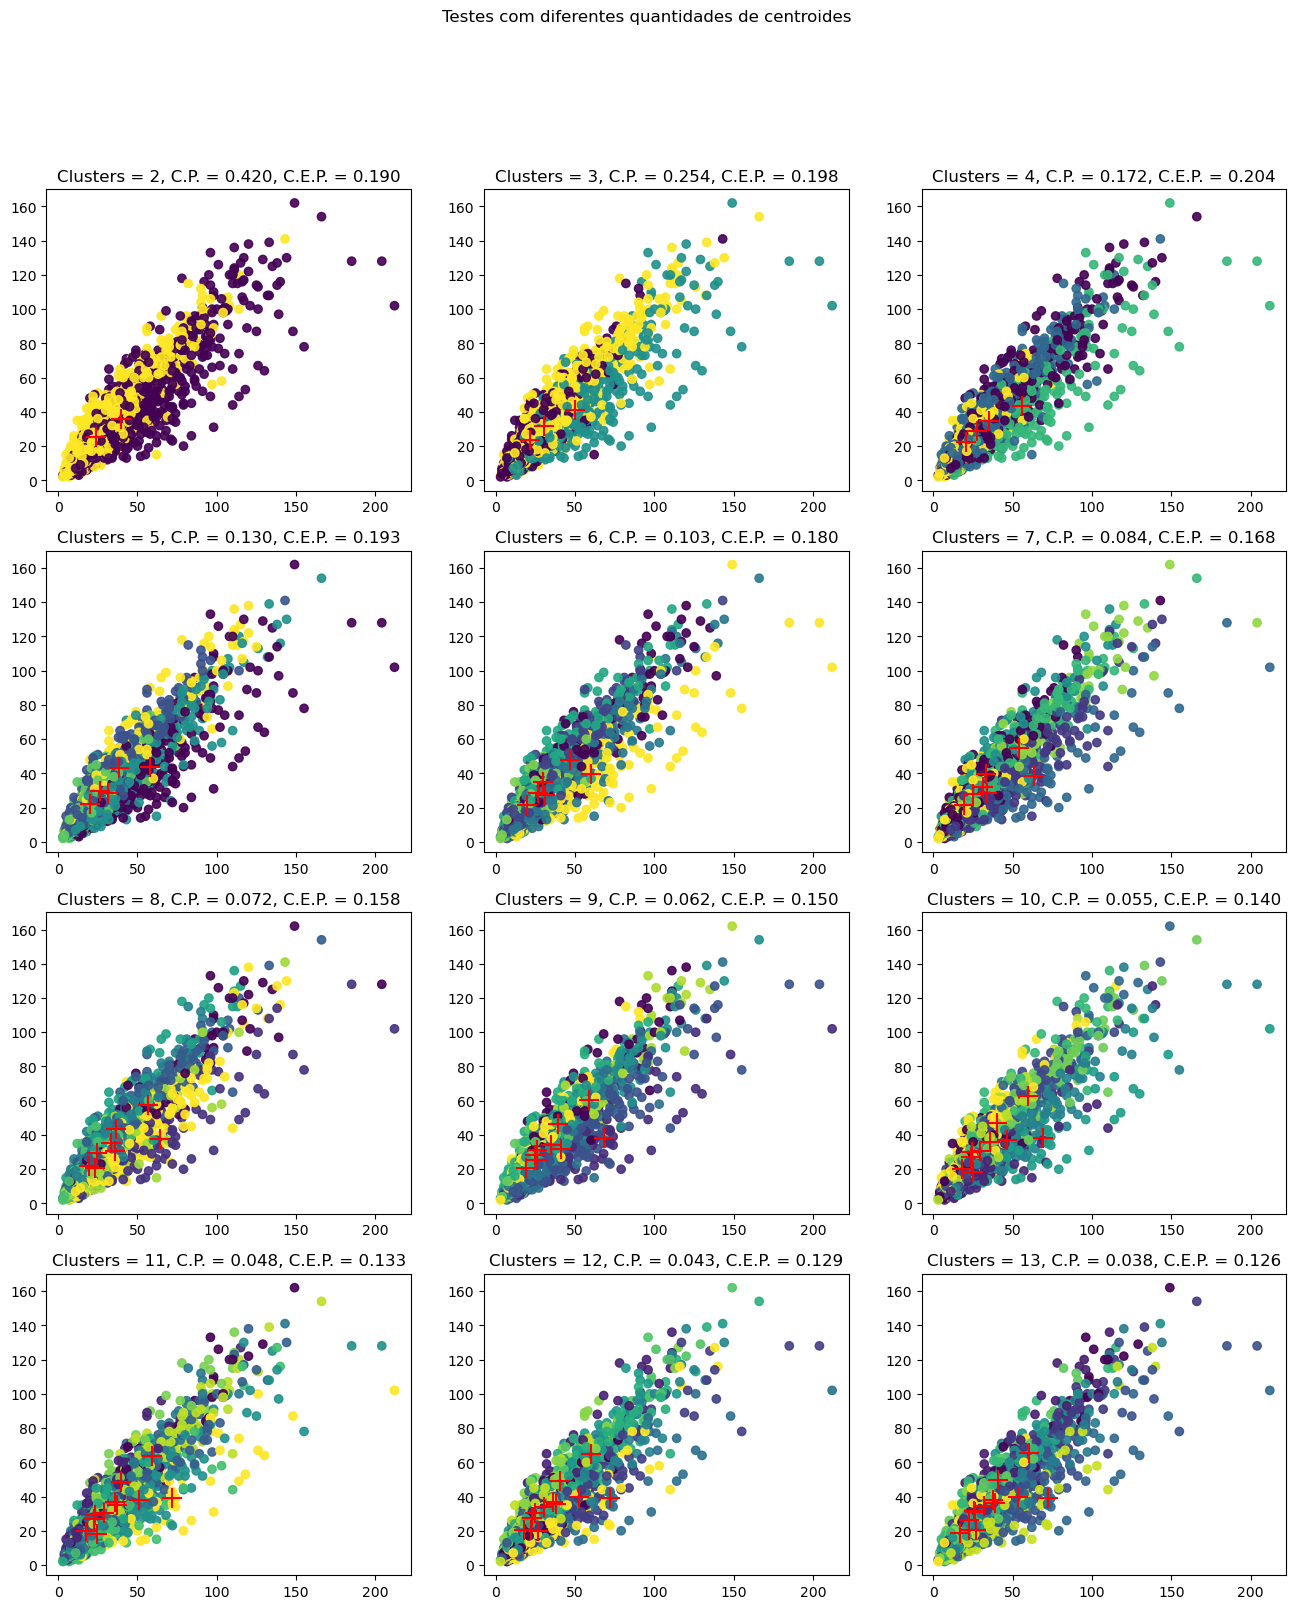

In [11]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "cosine",
                  m = 2.0)
    fcmeans.fit(novo_df_ureia_tratado.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(novo_df_ureia_tratado.values)
    
    eixo.scatter(novo_df_ureia_tratado.values[:,0], novo_df_ureia_tratado.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

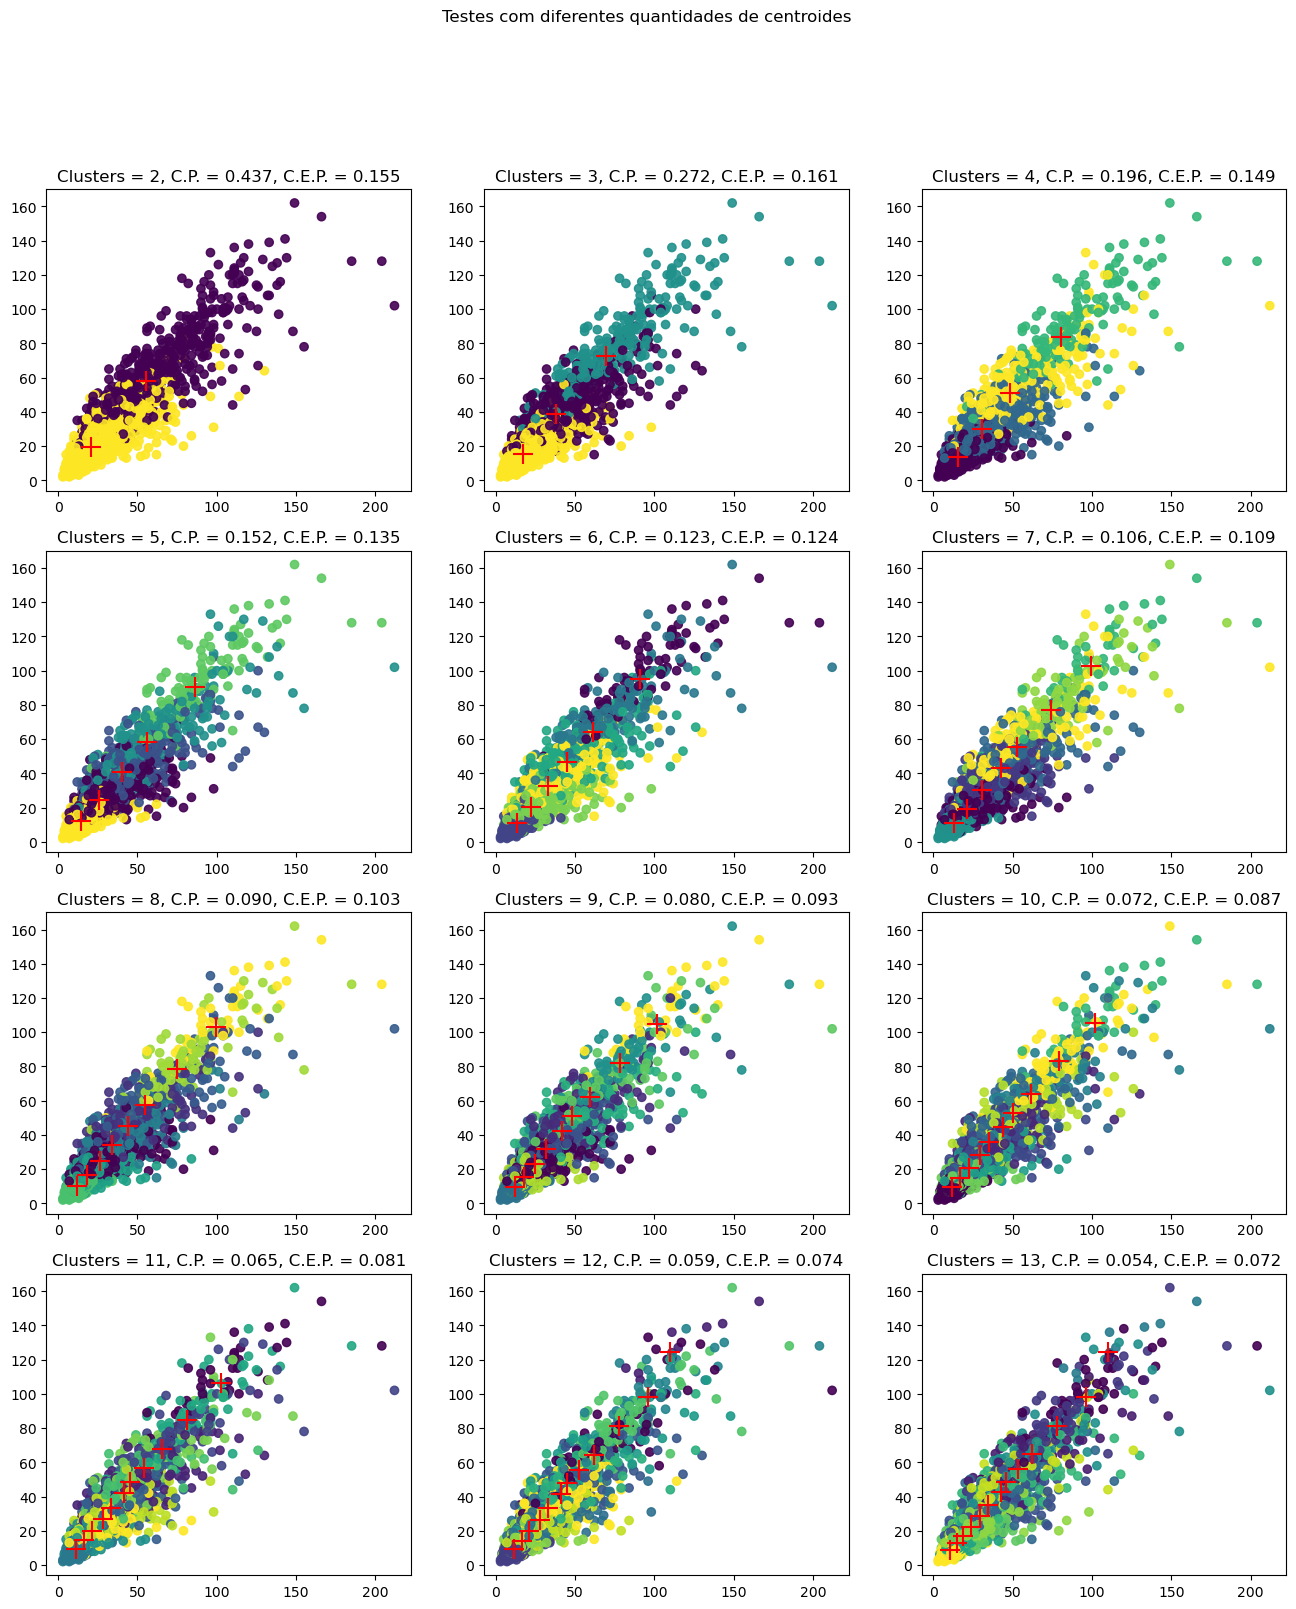

In [12]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "minkowski",
                  m = 2.0,
                  distance_params = {"p": 1.0})
    fcmeans.fit(novo_df_ureia_tratado.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(novo_df_ureia_tratado.values)
    
    eixo.scatter(novo_df_ureia_tratado.values[:,0], novo_df_ureia_tratado.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

/home/igorsantana/anaconda3/envs/.petca-venv/lib/python3.12/site-packages/fcmeans/main.py:94: RuntimeWarning: invalid value encountered in power
  temp = FCM._dist(


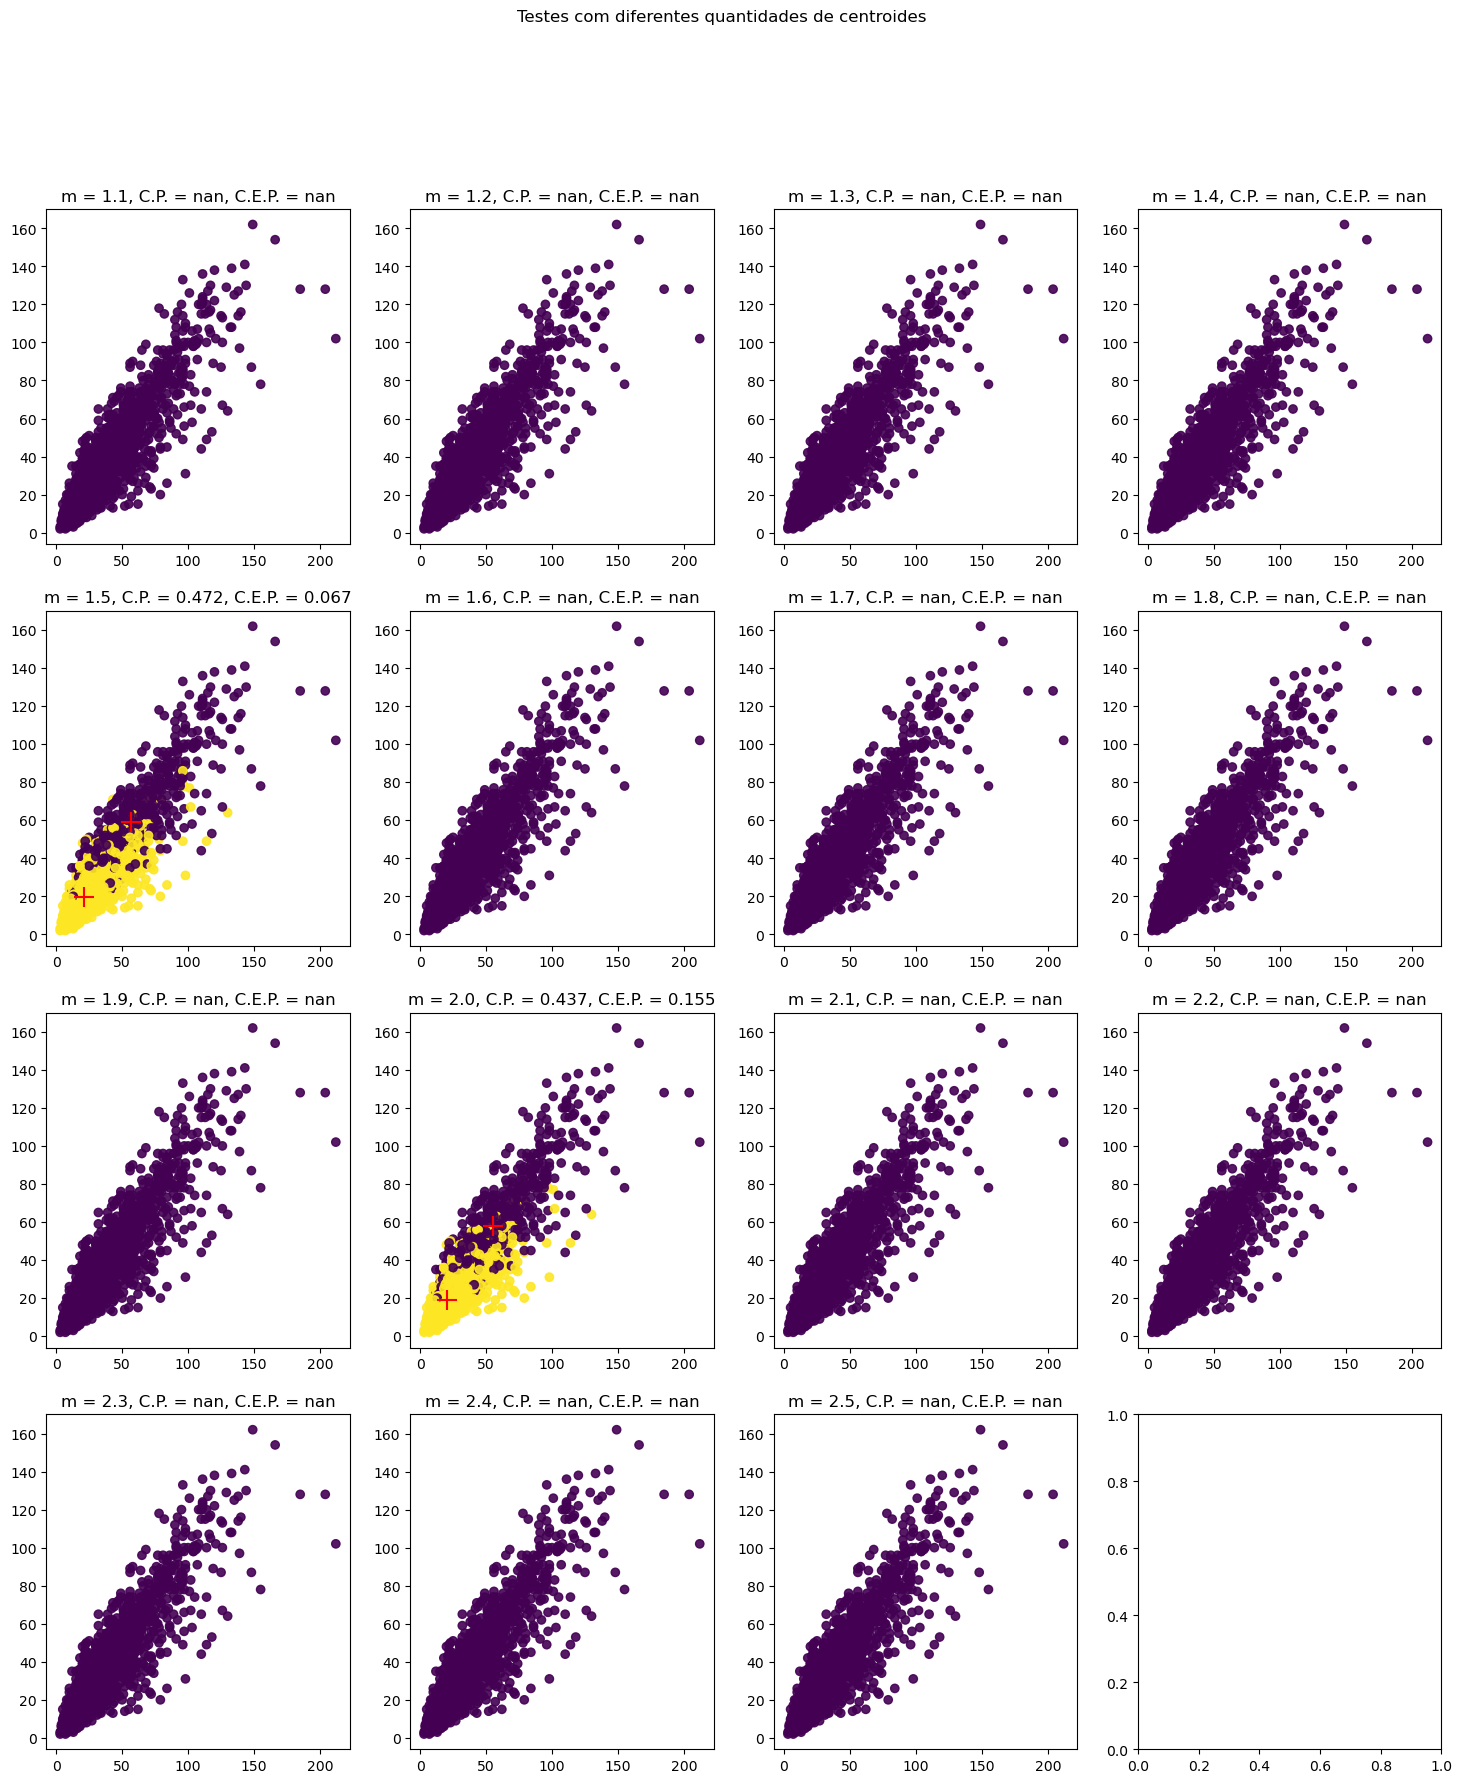

In [13]:
lista_parametros_fuzzy = [round(i, 1) for i in np.arange(1.1, 2.6, 0.1)]
modelos = []

for parametro_fuzzy in lista_parametros_fuzzy:
    fcmeans = FCM(n_clusters = 2,
                  random_state = 42,
                  max_iter = 500,
                  distance = "minkowski",
                  m = parametro_fuzzy,
                  distance_params = {"p": 1.0})
    fcmeans.fit(novo_df_ureia_tratado.values)
    modelos.append(fcmeans)
    
qtd_parametro_fuzzy = len(lista_parametros_fuzzy)
linhas = int(np.ceil(np.sqrt(qtd_parametro_fuzzy)))
colunas = int(np.ceil(qtd_parametro_fuzzy / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (18, 20))

for parametro_fuzzy, modelo, eixo in zip(lista_parametros_fuzzy, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(novo_df_ureia_tratado.values)
    
    eixo.scatter(novo_df_ureia_tratado.values[:,0], novo_df_ureia_tratado.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"m = {parametro_fuzzy}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

### Imprimindo clusteres

In [14]:
fcmeans_ureia = FCM(n_clusters = 2,
                    random_state = 42,
                    max_iter = 500,
                    distance = "minkowski",
                    m = 1.5,
                    distance_params = {"p": 1.0})
fcmeans_ureia.fit(novo_df_ureia_tratado.values)
y_ureia = fcmeans_ureia.predict(novo_df_ureia_tratado.values)
centros_ureia = fcmeans_ureia.centers

In [15]:
np.unique(centros_ureia)

array([19.78266876, 19.90340742, 20.46736742, 21.34143078, 21.35523424,
       22.41634582, 23.418643  , 56.70843429, 59.14732215, 62.62680405,
       65.74460343, 67.92719788, 69.10333468, 69.50441513])

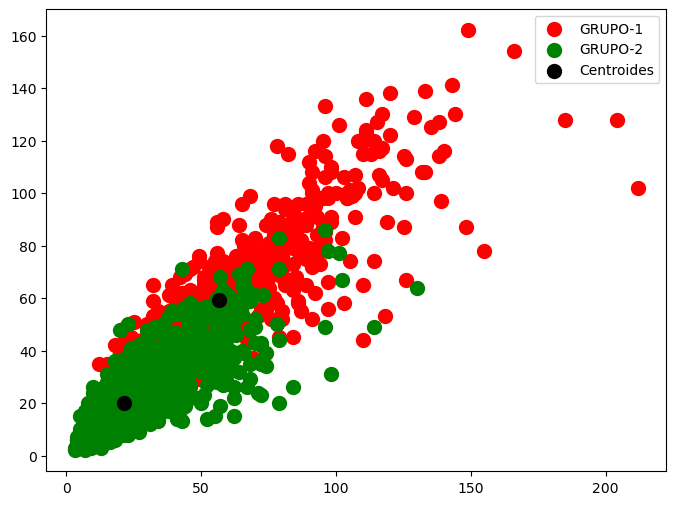

In [16]:
plt.figure(figsize = (8, 6))

### OS PONTOS GERAIS
plt.scatter(novo_df_ureia_tratado.values[y_ureia == 0, 0], novo_df_ureia_tratado.values[y_ureia == 0, 1], s = 100, c = "red", label = "GRUPO-1")
plt.scatter(novo_df_ureia_tratado.values[y_ureia == 1, 0], novo_df_ureia_tratado.values[y_ureia == 1, 1], s = 100, c = "green", label = "GRUPO-2")

### OS CENTROIDES
plt.scatter(centros_ureia[:, 0], centros_ureia[:, 1], s = 100, c = "black", label = "Centroides")

plt.legend()
plt.show()

### Testando novamente com Dataset despivoteado e multi-indexado

#### Despivoteado

In [72]:
colunas = df_ureia.columns.to_list()
colunas.pop(0)

df_ureia.reset_index(inplace = True)
df_ureia_despivoteado = despivotear_dataset(df_ureia,
                                            ["subject_id"],
                                            colunas,
                                            "UreiaMaxDay",
                                            "day")
df_ureia_despivoteado["day"] = renomear_series(df_ureia_despivoteado["day"], "ureia_dia_")
df_ureia_despivoteado.head(15)

subject_id day  UreiaMaxDay
0     10001884   2          NaN
1     10004422   2         13.0
2     10004733   2         41.0
3     10005606   2          6.0
4     10010867   2          5.0
5     10019777   2         22.0
6     10020944   2         28.0
7     10023486   2         48.0
8     10032381   2          9.0
9     10035747   2         16.0
10    10037483   2         40.0
11    10037861   2         24.0
12    10038688   2         27.0
13    10038999   2         21.0
14    10040025   2         62.0

#### Multi-indexando

In [73]:
df_ureia_despivoteado = multi_indexar_dataset(df_ureia_despivoteado, indices = ["subject_id", "day"])
df_ureia_despivoteado.dropna(axis = 0, inplace = True)
df_ureia_despivoteado.head(15)

UreiaMaxDay
subject_id day             
10001884   3           38.0
           4           31.0
           5           26.0
           6           22.0
           7           14.0
10004422   2           13.0
           3           17.0
           4           16.0
           5           20.0
           6           24.0
10004733   2           41.0
           3           39.0
           4           37.0
           5           28.0
           6           26.0

#### Rodando o algoritmo F-c-Means

In [74]:
fcmeans_ureia = FCM(n_clusters = 3,
                    random_state = 42,
                    max_iter = 500,
                    distance = "minkowski",
                    m = 1.5,
                    distance_params = {"p": 1.0})
fcmeans_ureia.fit(df_ureia_despivoteado.values)
y_ureia = fcmeans_ureia.predict(df_ureia_despivoteado.values)
centros_ureia = fcmeans_ureia.centers

/home/igorsantana/anaconda3/envs/.petca-venv/lib/python3.12/site-packages/fcmeans/main.py:102: RuntimeWarning: divide by zero encountered in divide
  lambda data, col: (data[:, col] / data.T).sum(0)
/home/igorsantana/anaconda3/envs/.petca-venv/lib/python3.12/site-packages/fcmeans/main.py:102: RuntimeWarning: invalid value encountered in divide
  lambda data, col: (data[:, col] / data.T).sum(0)


In [75]:
print("Centros:", centros_ureia)

Centros: [[nan]
 [nan]
 [nan]]


##### Imprimindo resultado do teste

In [76]:
plt.figure(figsize = (8, 6))

plt.scatter(df_ureia_despivoteado.values[y_ureia == 0, 0], df_ureia_despivoteado.values[y_ureia == 0, 1], s = 100, c = "red", label = "GRUPO_1")
plt.scatter(df_ureia_despivoteado.values[y_ureia == 1, 0], df_ureia_despivoteado.values[y_ureia == 1, 1], s = 100, c = "green", label = "GRUPO_2")
plt.scatter(df_ureia_despivoteado.values[y_ureia == 2, 0], df_ureia_despivoteado.values[y_ureia == 2, 1], s = 100, c = "blue", label = "GRUPO_3")

plt.scatter(centros_ureia[:, 0], centros_ureia[:, 0], s = 100, c = "black", label = "Centroides")

plt.legend()
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 800x600 with 0 Axes>

### Testando novamente com Dataset pivoteado, mas dropando os valores nulos

#### Dropando os valores nulos

In [77]:
df_ureia_sem_nulos = df_ureia.dropna(axis = 0, inplace = False)
df_ureia_sem_nulos.head(10)

subject_id  ureia_dia_1  ureia_dia_2  ureia_dia_3  ureia_dia_4  \
2     10004733         44.0         41.0         39.0         37.0   
4     10010867          8.0          5.0          5.0          5.0   
5     10019777         17.0         22.0         16.0         19.0   
6     10020944         34.0         28.0         26.0         22.0   
7     10023486         42.0         48.0         54.0         63.0   
8     10032381          9.0          9.0          9.0         14.0   
9     10035747         20.0         16.0         14.0         14.0   
10    10037483         54.0         40.0         41.0         44.0   
11    10037861         21.0         24.0         25.0         29.0   
12    10038688         26.0         27.0         29.0         29.0   

    ureia_dia_5  ureia_dia_6  ureia_dia_7  
2          28.0         26.0         28.0  
4           6.0          7.0          9.0  
5          18.0         17.0         16.0  
6          21.0         20.0         19.0  
7          68.0         69.0         70.0  
8          21.0         24.0         26.0  
9          19.0         19.0         18.0  
10         43.0         49.0         49.0  
11         47.0         65.0         75.0  
12         28.0         31.0         35.0

#### Rodando o algoritmo F-c-Means

In [78]:
fcmeans_ureia = FCM(n_clusters = 2,
                    random_state = 42,
                    max_iter = 500,
                    distance = "minkowski",
                    m = 1.5,
                    distance_params = {"p": 1.0})
fcmeans_ureia.fit(df_ureia_sem_nulos.values)
y_ureia = fcmeans_ureia.predict(df_ureia_sem_nulos.values)
centros_ureia = fcmeans_ureia.centers

In [79]:
print("Centros:", centros_ureia)

Centros: [[1.16868657e+07 1.10620931e+03 2.99814676e+01 6.69025176e+02
  3.16999947e+01 1.10840360e+03 1.10929853e+03 3.53091504e+01]
 [1.51750287e+07 3.24367509e+01 3.05573136e+01 2.03399373e+02
  3.20212147e+01 3.34411373e+01 3.41486182e+01 3.66043855e+01]
 [1.84503603e+07 2.12406706e+03 2.13406952e+03 3.02700103e+01
  3.11994819e+01 1.08374498e+03 3.34684038e+01 1.07042936e+03]]


##### Imprimindo resultado do teste

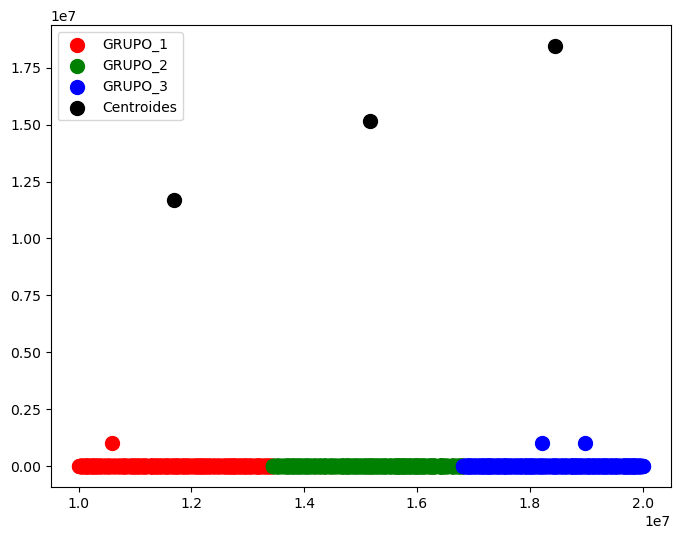

In [80]:
plt.figure(figsize = (8, 6))

plt.scatter(df_ureia_sem_nulos.values[y_ureia == 0, 0], df_ureia_sem_nulos.values[y_ureia == 0, 1], s = 100, c = "red", label = "GRUPO_1")
plt.scatter(df_ureia_sem_nulos.values[y_ureia == 1, 0], df_ureia_sem_nulos.values[y_ureia == 1, 1], s = 100, c = "green", label = "GRUPO_2")

plt.scatter(centros_ureia[:, 0], centros_ureia[:, 0], s = 100, c = "black", label = "Centroides")

plt.legend()
plt.show()

#### Testando com outras quantidades de centroides

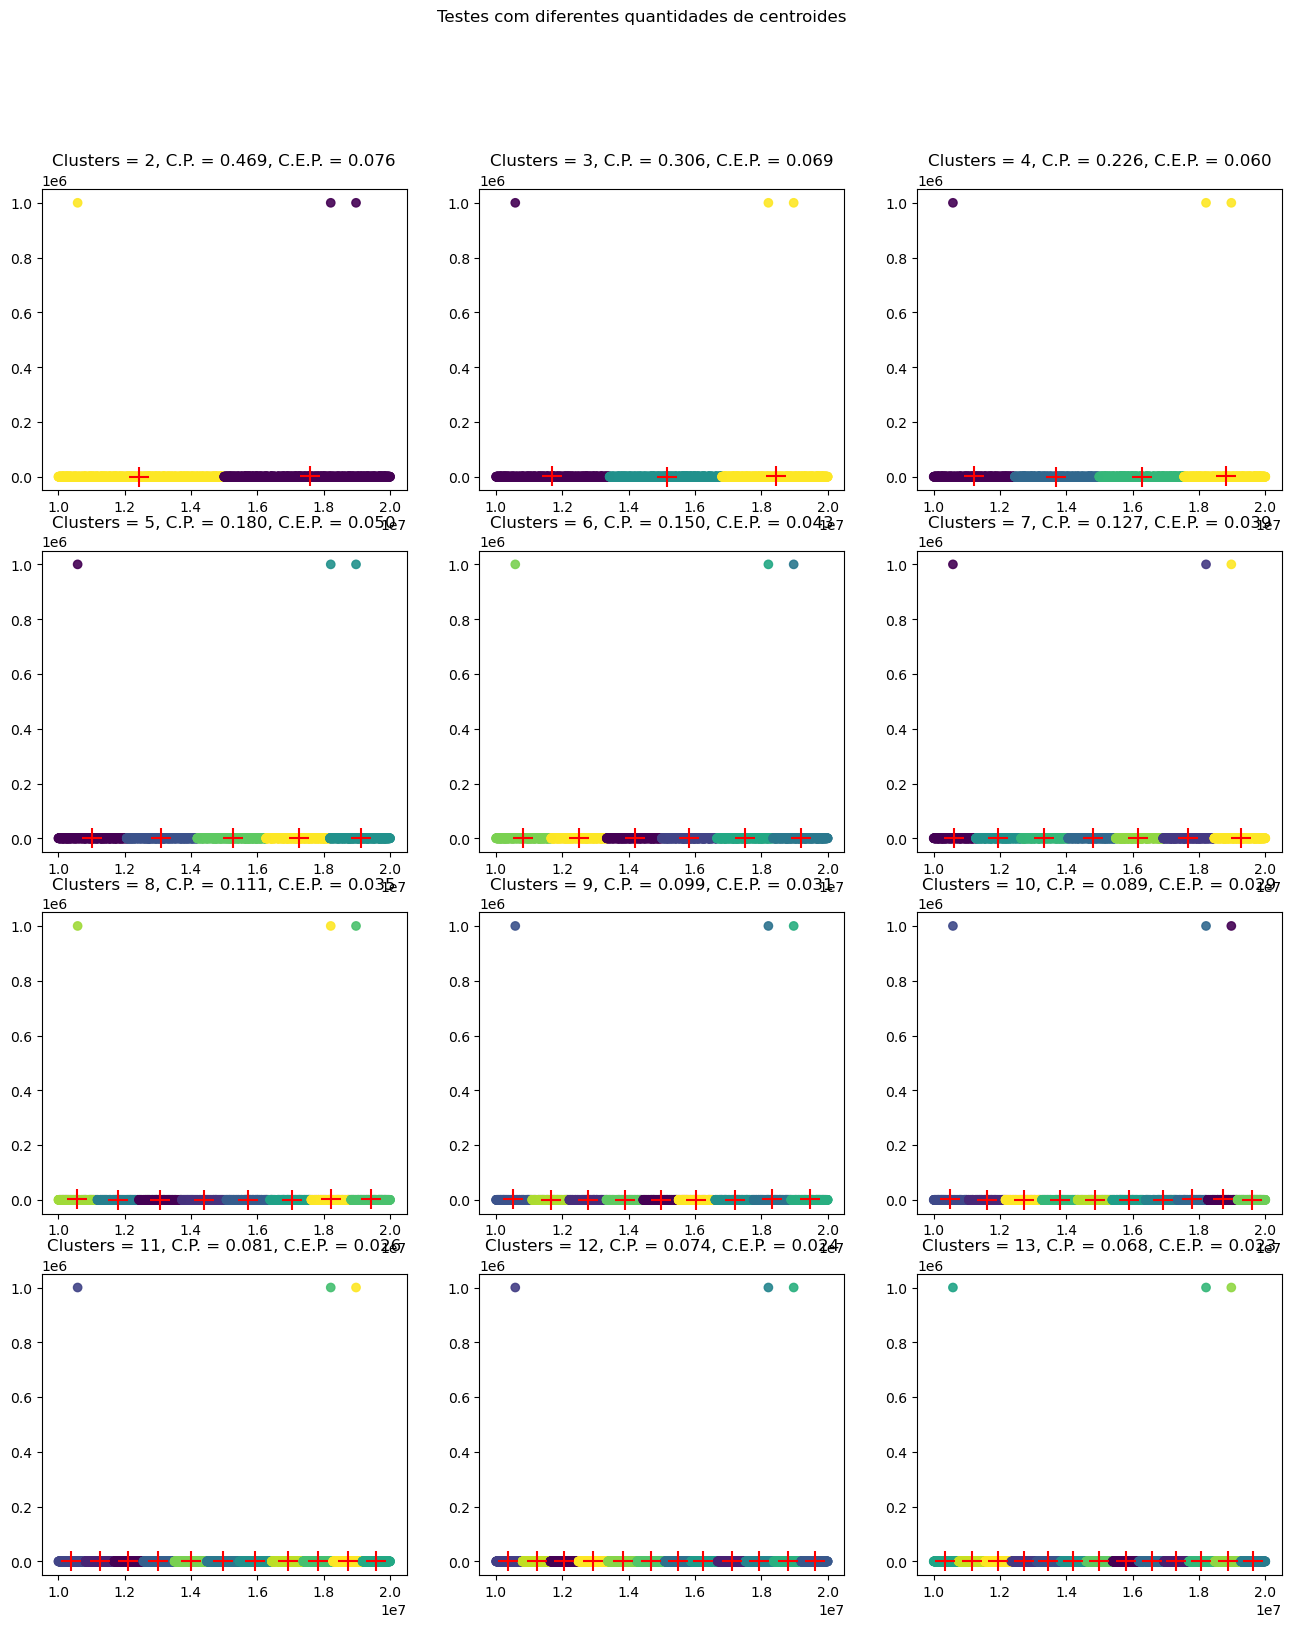

In [81]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "euclidean",
                  m = 1.5)
    fcmeans.fit(df_ureia_sem_nulos.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_ureia_sem_nulos.values)
    
    eixo.scatter(df_ureia_sem_nulos.values[:,0], df_ureia_sem_nulos.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

### DATASET creatinina

#### Removendo valores outliers do dataset e os substituindo por `np.nan`

In [17]:
novo_df_creatinina_tratado = deletar_valores_absurdos(df_creatinina, df_creatinina.max().max())
novo_df_creatinina_tratado.max()

creatinina_dia_1    117.0
creatinina_dia_2     16.0
creatinina_dia_3     15.0
creatinina_dia_4     14.6
creatinina_dia_5     14.7
creatinina_dia_6     15.2
creatinina_dia_7     15.6
dtype: float64

#### Iterando pelo dataset e inserindo dados de dias anteriores em dias posteriores que contém dados nulos

In [18]:
novo_df_creatinina_tratado = preencher_valores_faltantes_linha(novo_df_creatinina_tratado)
novo_df_creatinina_tratado.head(10)

creatinina_dia_1  creatinina_dia_2  creatinina_dia_3  \
subject_id                                                         
10001884                 1.1               1.1               1.3   
10004422                 0.7               0.7               0.7   
10004733                 3.4               3.8               3.7   
10005606                 0.7               0.6               0.5   
10010867                 0.7               0.7               0.5   
10019777                 0.9               0.7               0.9   
10020944                 1.4               1.6               1.8   
10023486                 3.1               3.4               3.2   
10032381                 1.3               1.2               1.2   
10035747                 1.1               1.1               0.9   

            creatinina_dia_4  creatinina_dia_5  creatinina_dia_6  \
subject_id                                                         
10001884                 0.9               0.8               0.6   
10004422                 0.6               0.6               0.7   
10004733                 3.4               2.6               2.6   
10005606                 0.4               0.5               0.5   
10010867                 0.3               0.4               0.5   
10019777                 0.8               0.7               0.6   
10020944                 1.6               1.5               1.8   
10023486                 3.4               2.8               2.2   
10032381                 1.2               1.2               1.2   
10035747                 0.9               1.0               0.9   

            creatinina_dia_7  
subject_id                    
10001884                 0.5  
10004422                 0.7  
10004733                 2.7  
10005606                 0.5  
10010867                 0.5  
10019777                 0.5  
10020944                 1.6  
10023486                 1.9  
10032381                 1.2  
10035747                 0.9

In [19]:
novo_df_creatinina_tratado.isna().sum()

creatinina_dia_1    17
creatinina_dia_2     2
creatinina_dia_3     5
creatinina_dia_4     5
creatinina_dia_5     7
creatinina_dia_6    12
creatinina_dia_7    33
dtype: int64

#### Deletando linhas que contém valores nulos - mesmo depois da inserção de dados artificiais

In [20]:
novo_df_creatinina_tratado[novo_df_creatinina_tratado.isna().any(axis = 1)].index

Index([10344732, 10463546, 10477920, 10553635, 10615339, 10996857, 11542534,
       11611745, 11638303, 11663336, 11833476, 12344021, 12374214, 12606435,
       12917345, 12934260, 13679248, 13681485, 13824877, 13827765, 13911200,
       14363068, 14383658, 14623418, 14691603, 14696918, 14785854, 14816630,
       15090519, 15158294, 15204620, 15409850, 15455733, 15583807, 15640315,
       15763754, 15993533, 16327028, 16832227, 17131210, 17327554, 17484283,
       17635990, 17718694, 17803326, 18135694, 18152377, 18560897, 18638524,
       18757959, 19571102, 19571265, 19694231],
      dtype='int64', name='subject_id')

In [21]:
novo_df_creatinina_tratado = novo_df_creatinina_tratado.dropna(axis = 0)
novo_df_creatinina_tratado.isna().sum().sum()

0

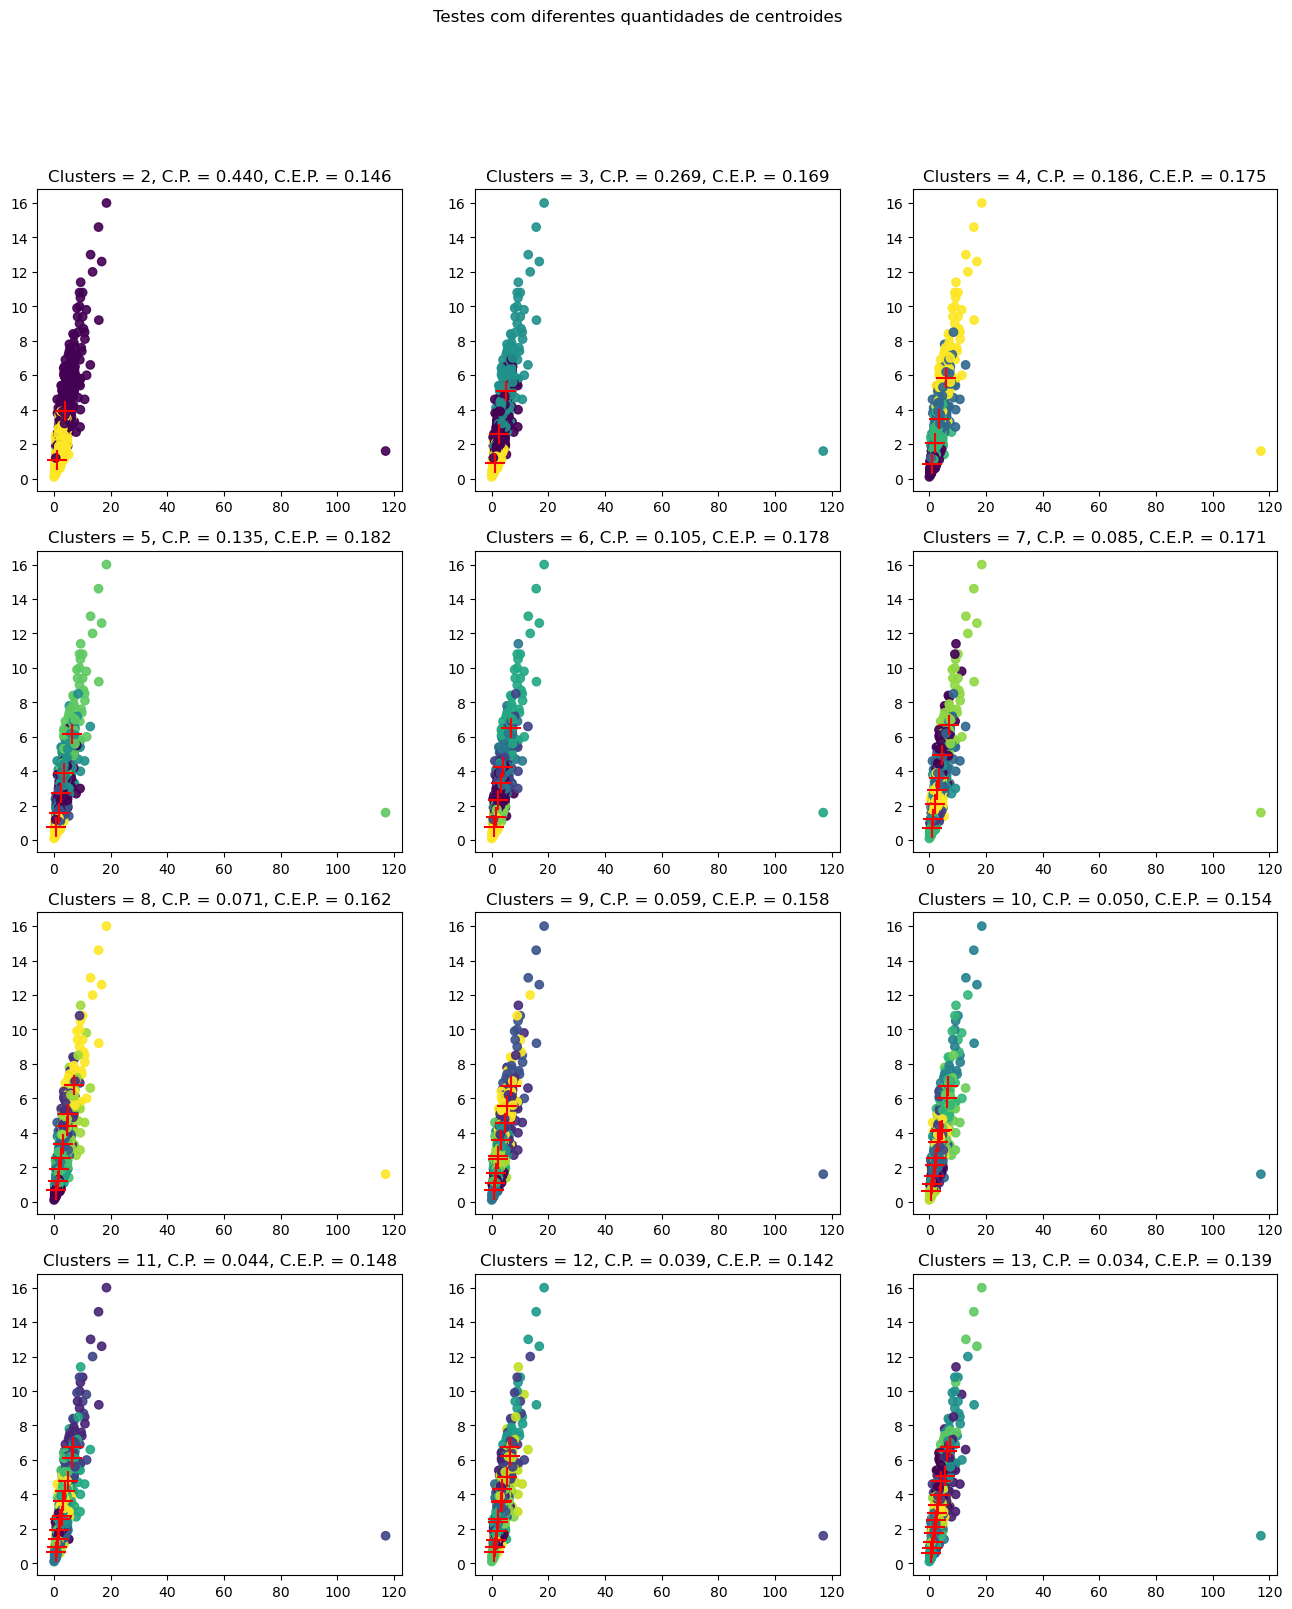

In [23]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "euclidean",
                  m = 2.0)
    fcmeans.fit(novo_df_creatinina_tratado.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(novo_df_creatinina_tratado.values)
    
    eixo.scatter(novo_df_creatinina_tratado.values[:,0], novo_df_creatinina_tratado.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

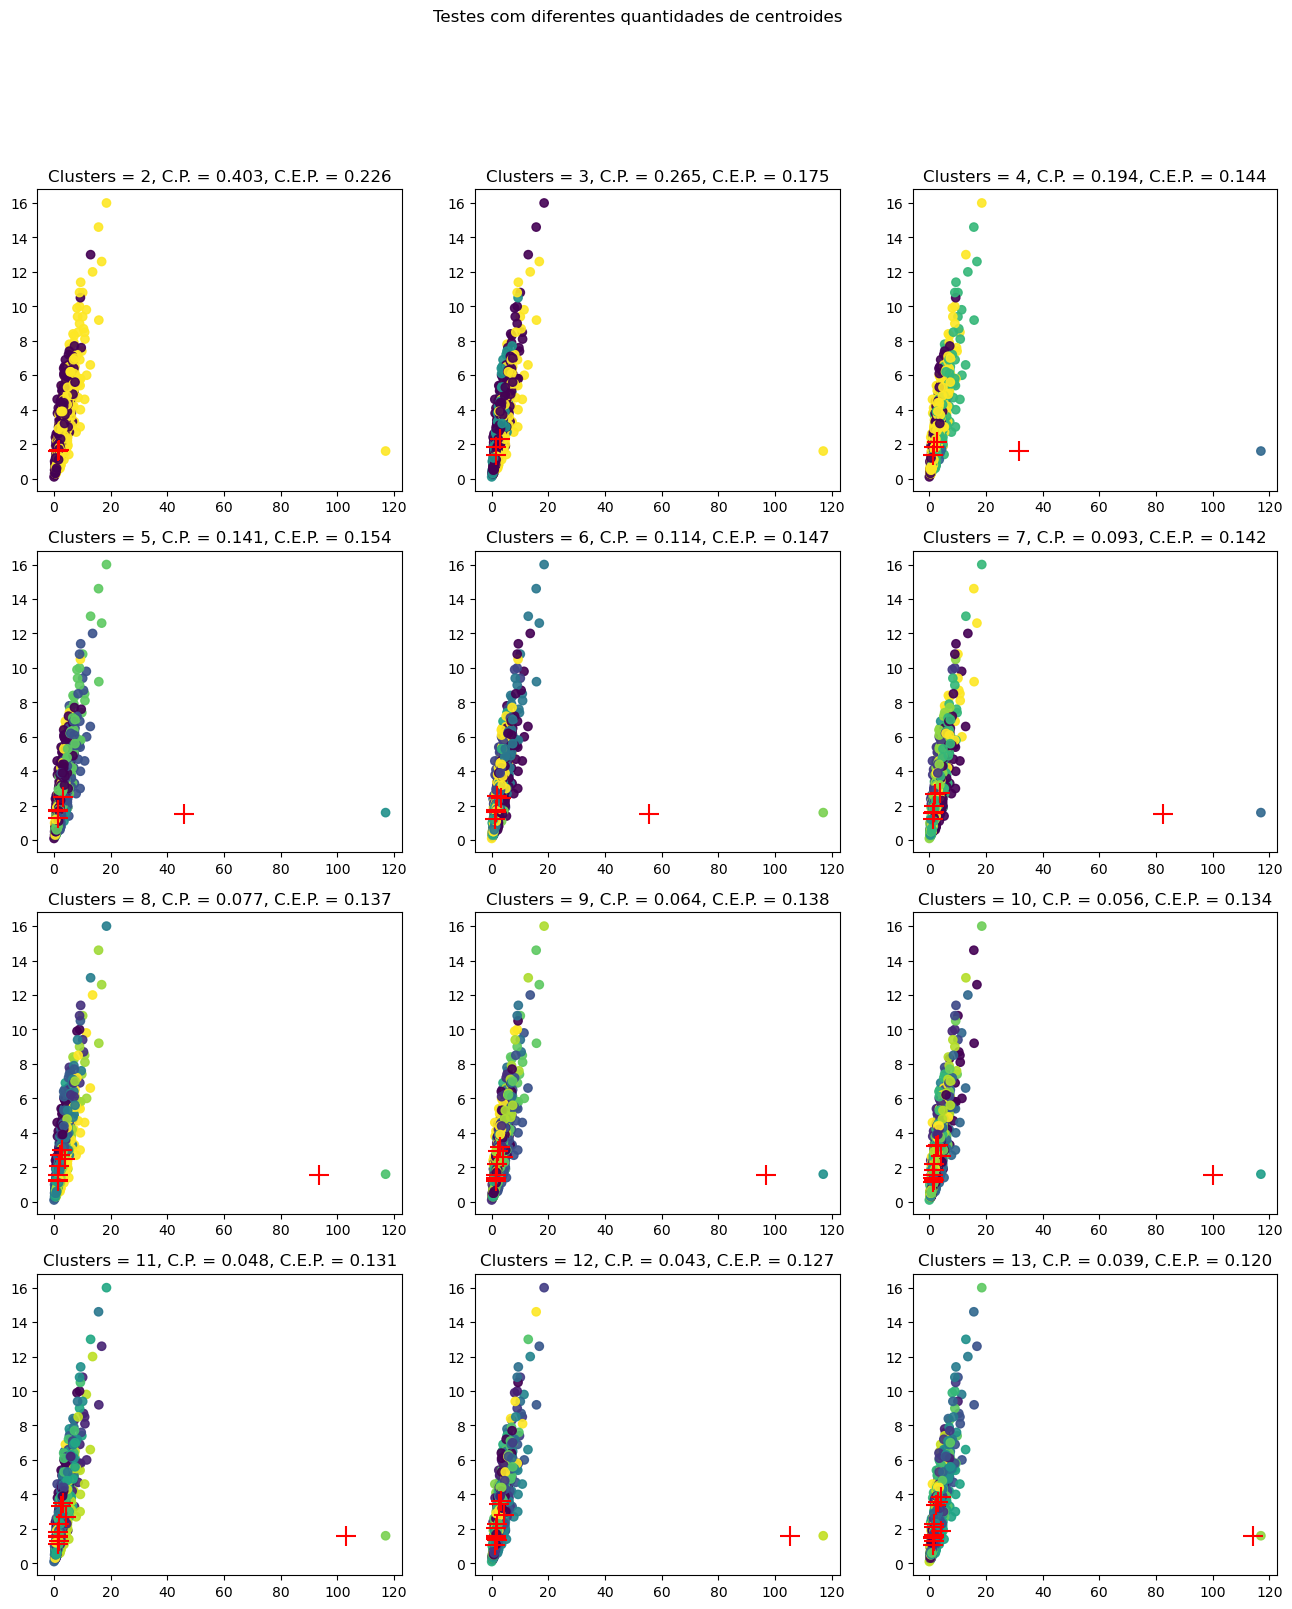

In [25]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "cosine",
                  m = 2.0)
    fcmeans.fit(novo_df_creatinina_tratado.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(novo_df_creatinina_tratado.values)
    
    eixo.scatter(novo_df_creatinina_tratado.values[:,0], novo_df_creatinina_tratado.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

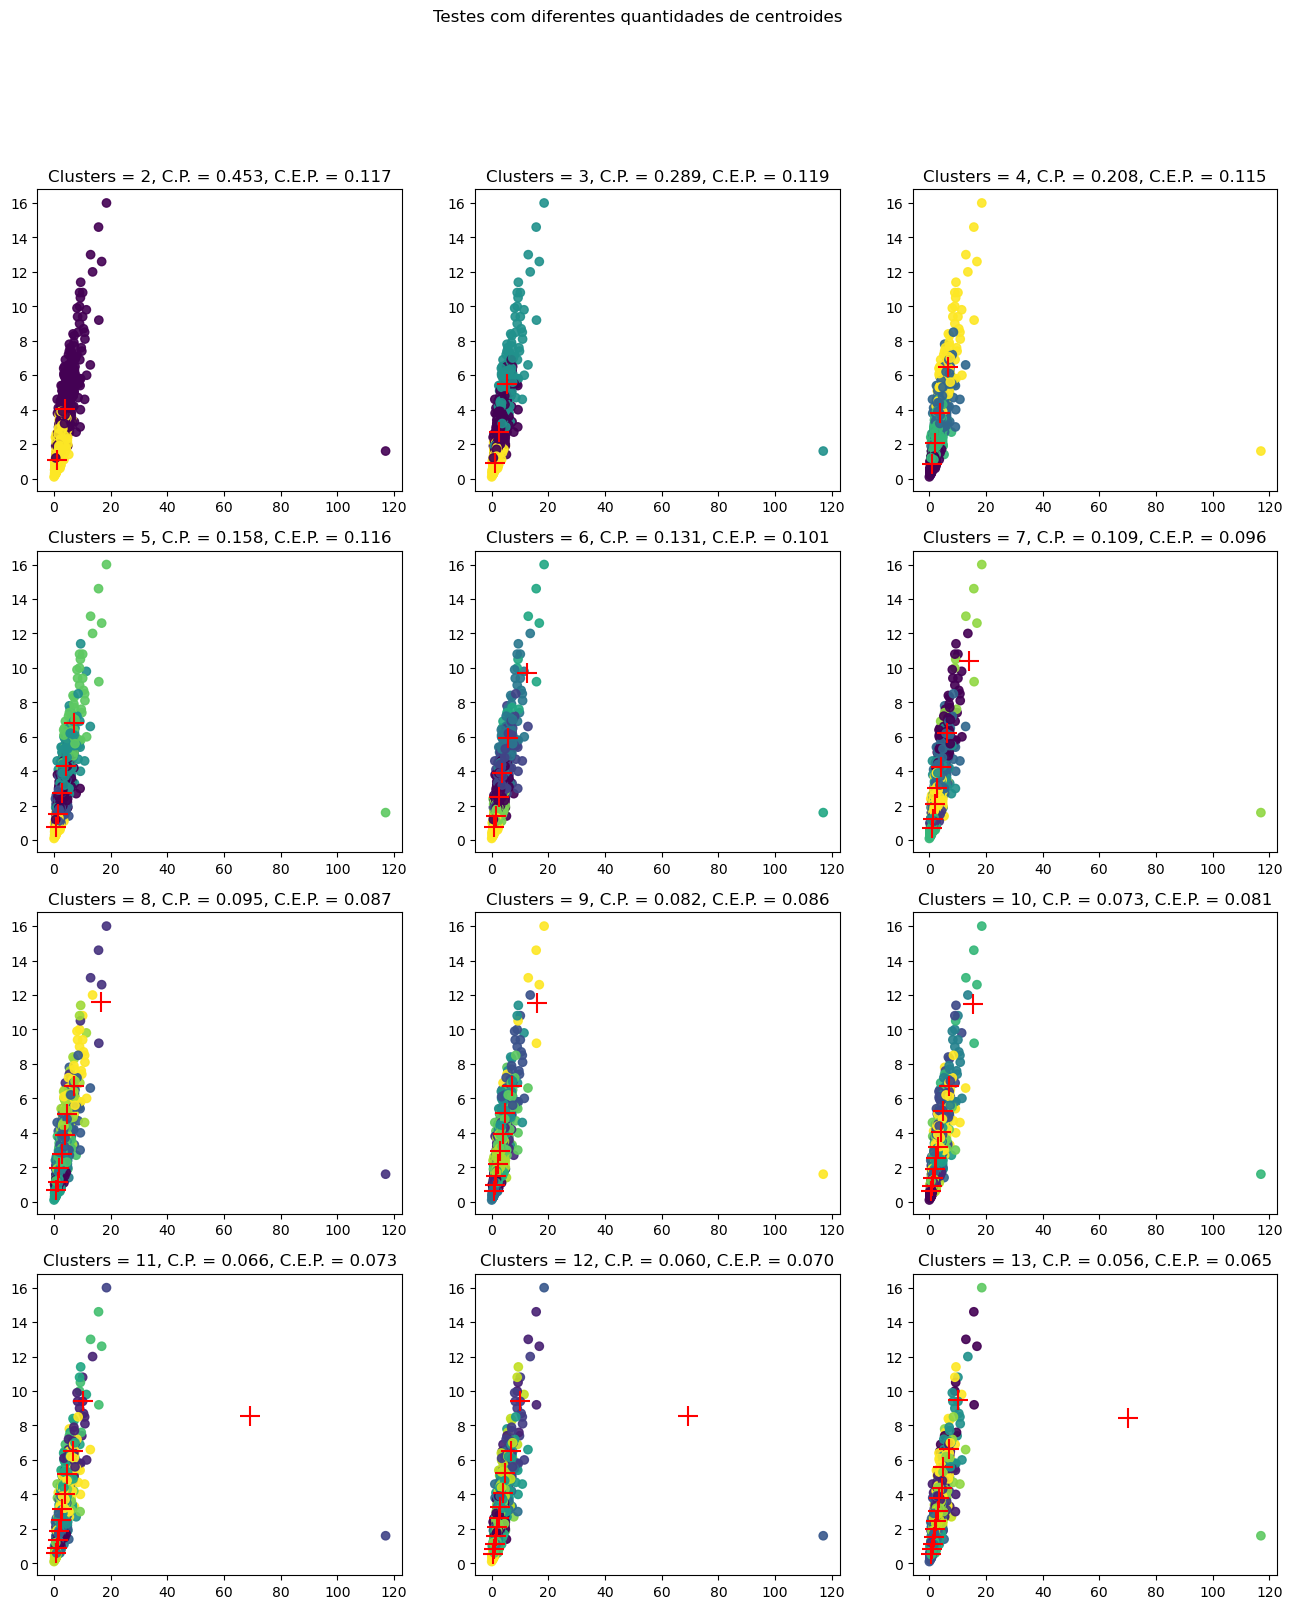

In [26]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "minkowski",
                  m = 2.0,
                  distance_params = {"p": 1.0})
    fcmeans.fit(novo_df_creatinina_tratado.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(novo_df_creatinina_tratado.values)
    
    eixo.scatter(novo_df_creatinina_tratado.values[:,0], novo_df_creatinina_tratado.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

/home/igorsantana/anaconda3/envs/.petca-venv/lib/python3.12/site-packages/fcmeans/main.py:94: RuntimeWarning: invalid value encountered in power
  temp = FCM._dist(


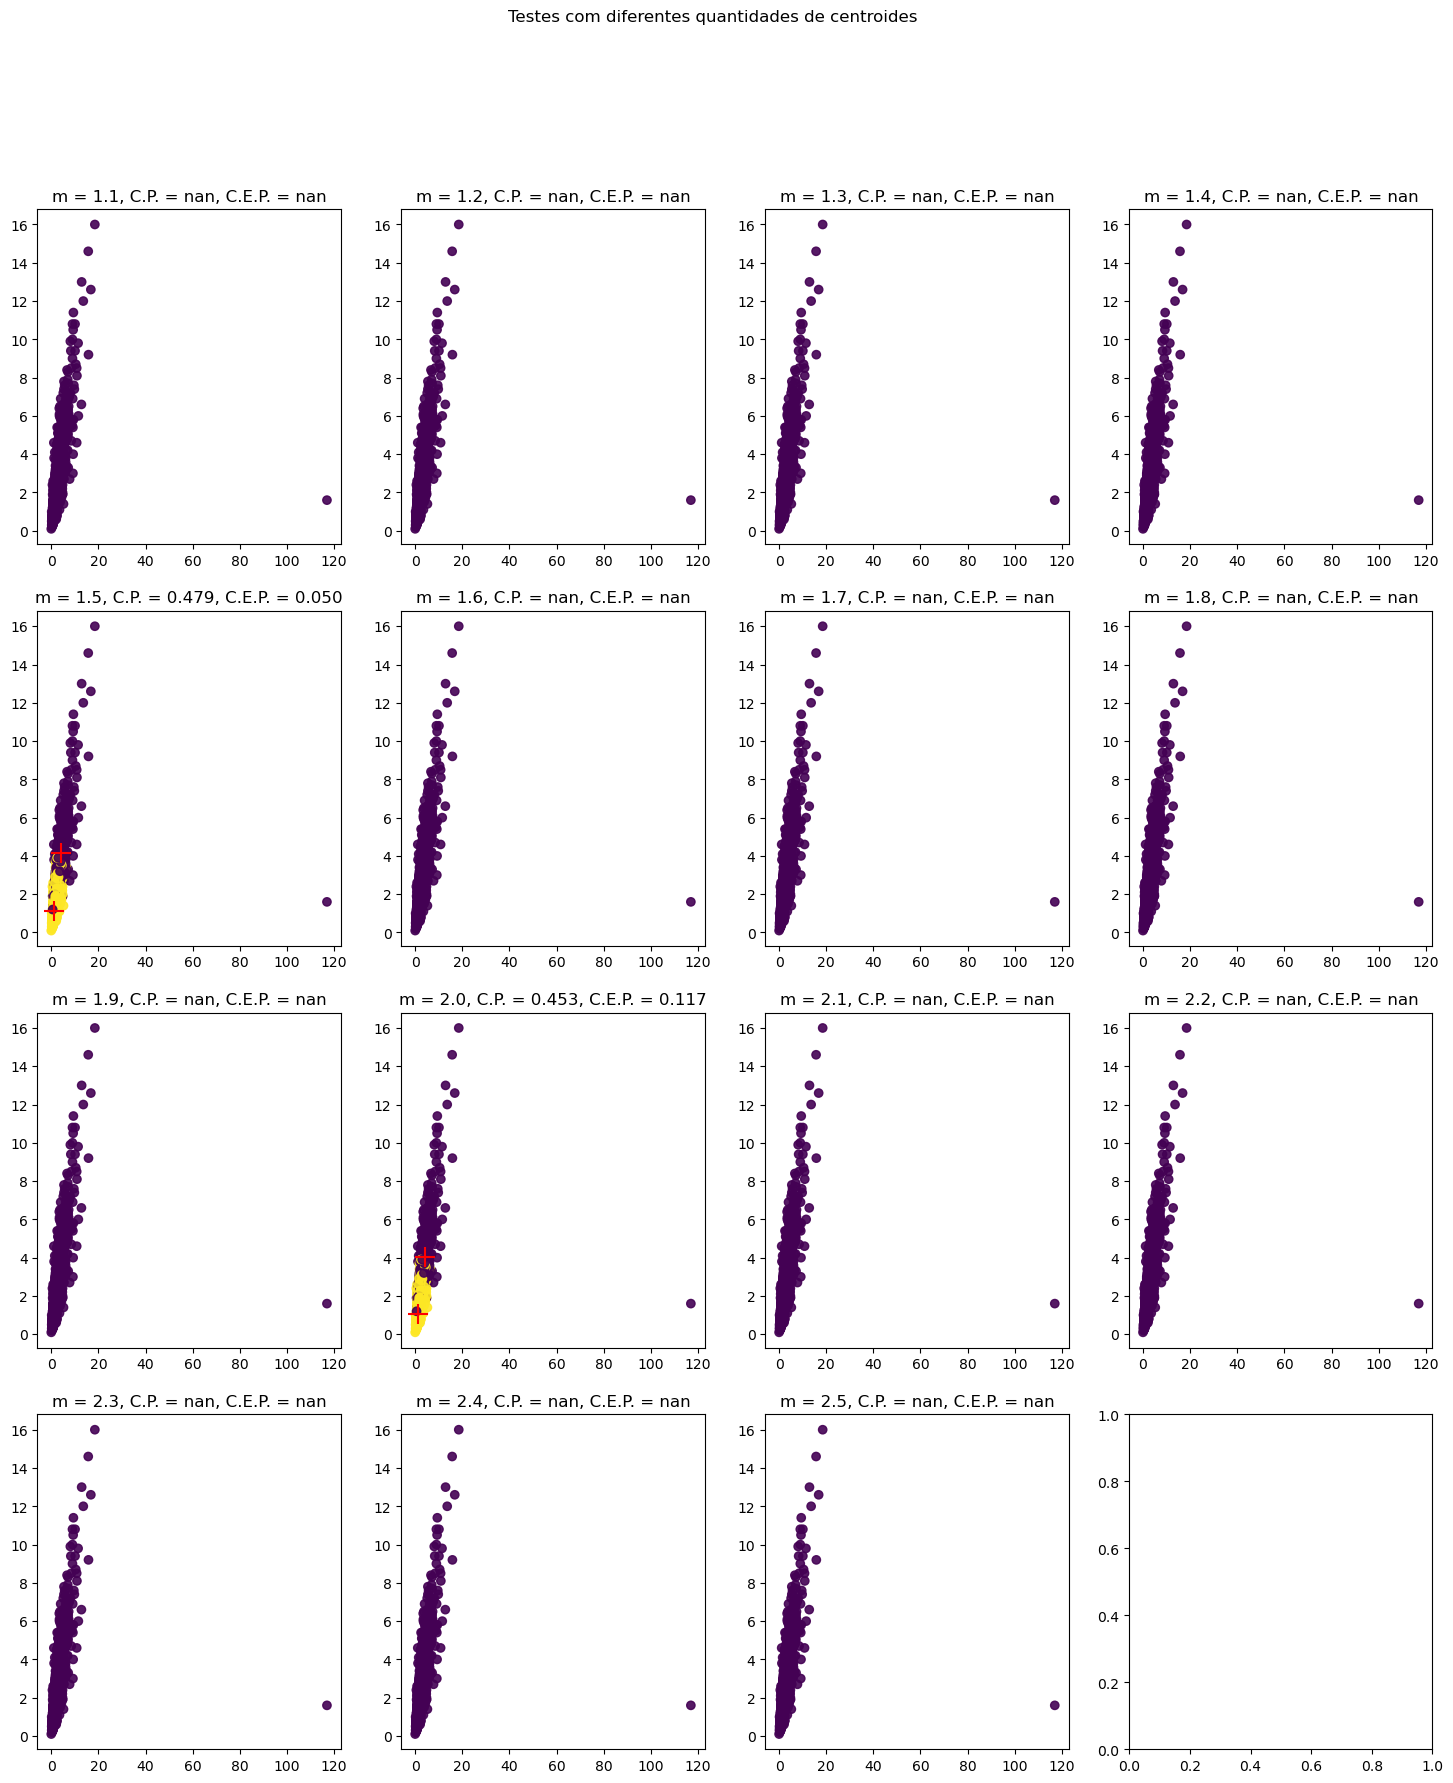

In [27]:
lista_parametros_fuzzy = [round(i, 1) for i in np.arange(1.1, 2.6, 0.1)]
modelos = []

for parametro_fuzzy in lista_parametros_fuzzy:
    fcmeans = FCM(n_clusters = 2,
                  random_state = 42,
                  max_iter = 500,
                  distance = "minkowski",
                  m = parametro_fuzzy,
                  distance_params = {"p": 1.0})
    fcmeans.fit(novo_df_creatinina_tratado.values)
    modelos.append(fcmeans)
    
qtd_parametro_fuzzy = len(lista_parametros_fuzzy)
linhas = int(np.ceil(np.sqrt(qtd_parametro_fuzzy)))
colunas = int(np.ceil(qtd_parametro_fuzzy / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (18, 20))

for parametro_fuzzy, modelo, eixo in zip(lista_parametros_fuzzy, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(novo_df_creatinina_tratado.values)
    
    eixo.scatter(novo_df_creatinina_tratado.values[:,0], novo_df_creatinina_tratado.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"m = {parametro_fuzzy}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

### Imprimindo clusteres

In [28]:
fcmeans_creatinina = FCM(n_clusters = 2,
                         random_state = 42,
                         max_iter = 500,
                         distance = "minkowski",
                         m = 1.5,
                         distance_params = {"p": 1.0})
fcmeans_creatinina.fit(novo_df_creatinina_tratado.values)
y_creatinina = fcmeans_creatinina.predict(novo_df_creatinina_tratado.values)
centros_creatinina = fcmeans_creatinina.centers

In [29]:
np.unique(centros_creatinina)

array([1.00455365, 1.0098547 , 1.01172716, 1.03457305, 1.0679125 ,
       1.1167144 , 1.17970466, 4.03414845, 4.10031485, 4.13715544,
       4.15465197, 4.19898599, 4.28203546, 4.30738973])

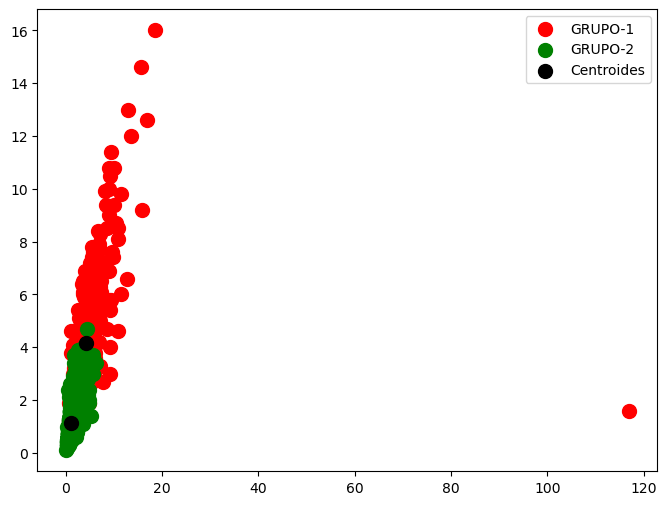

In [30]:
plt.figure(figsize = (8, 6))

### OS PONTOS GERAIS
plt.scatter(novo_df_creatinina_tratado.values[y_creatinina == 0, 0], novo_df_creatinina_tratado.values[y_creatinina == 0, 1], s = 100, c = "red", label = "GRUPO-1")
plt.scatter(novo_df_creatinina_tratado.values[y_creatinina == 1, 0], novo_df_creatinina_tratado.values[y_creatinina == 1, 1], s = 100, c = "green", label = "GRUPO-2")

### OS CENTROIDES
plt.scatter(centros_creatinina[:, 0], centros_creatinina[:, 1], s = 100, c = "black", label = "Centroides")

plt.legend()
plt.show()

### Testando novamente com Dataset despivoteado e multi-indexado

#### Despivoteado

In [89]:
colunas = df_creatinina.columns.to_list()
colunas.pop(0)

df_creatinina.reset_index(inplace = True)
df_creatinina_despivoteado = despivotear_dataset(df_creatinina,
                                                 ["subject_id"],
                                                 colunas,
                                                 "CreatininaMaxDay",
                                                 "day")
df_creatinina_despivoteado["day"] = renomear_series(df_creatinina_despivoteado["day"], "creatinina_dia_")
df_creatinina_despivoteado.head(15)

subject_id day  CreatininaMaxDay
0     10001884   2               NaN
1     10004422   2               0.7
2     10004733   2               3.8
3     10005606   2               0.6
4     10010867   2               0.7
5     10019777   2               0.7
6     10020944   2               1.6
7     10023486   2               3.4
8     10032381   2               1.2
9     10035747   2               1.1
10    10037483   2               1.4
11    10037861   2               1.3
12    10038688   2               1.9
13    10038999   2               0.8
14    10040025   2               2.2

#### Multi-indexando

In [90]:
df_creatinina_despivoteado = multi_indexar_dataset(df_creatinina_despivoteado, indices = ["subject_id", "day"])
df_creatinina_despivoteado.dropna(axis = 0, inplace = True)
df_creatinina_despivoteado.head(15)

CreatininaMaxDay
subject_id day                  
10001884   3                 1.3
           4                 0.9
           5                 0.8
           6                 0.6
           7                 0.5
10004422   2                 0.7
           3                 0.7
           4                 0.6
           5                 0.6
           6                 0.7
10004733   2                 3.8
           3                 3.7
           4                 3.4
           5                 2.6
           6                 2.6

#### Rodando o algoritmo F-c-Means

In [91]:
fcmeans_ureia = FCM(n_clusters = 3,
                    random_state = 42,
                    max_iter = 500,
                    distance = "minkowski",
                    m = 1.5,
                    distance_params = {"p": 1.0})
fcmeans_ureia.fit(df_creatinina_despivoteado.values)
y_creatinina = fcmeans_ureia.predict(df_creatinina_despivoteado.values)
centros_creatinina = fcmeans_ureia.centers

/home/igorsantana/anaconda3/envs/.petca-venv/lib/python3.12/site-packages/fcmeans/main.py:102: RuntimeWarning: divide by zero encountered in divide
  lambda data, col: (data[:, col] / data.T).sum(0)
/home/igorsantana/anaconda3/envs/.petca-venv/lib/python3.12/site-packages/fcmeans/main.py:102: RuntimeWarning: invalid value encountered in divide
  lambda data, col: (data[:, col] / data.T).sum(0)


In [92]:
print("Centros:", centros_creatinina)

Centros: [[nan]
 [nan]
 [nan]]


##### Imprimindo resultado do teste

In [93]:
plt.figure(figsize = (8, 6))

plt.scatter(df_ureia_despivoteado.values[y_creatinina == 0, 0], df_ureia_despivoteado.values[y_creatinina == 0, 1], s = 100, c = "red", label = "GRUPO_1")
plt.scatter(df_ureia_despivoteado.values[y_creatinina == 1, 0], df_ureia_despivoteado.values[y_creatinina == 1, 1], s = 100, c = "green", label = "GRUPO_2")
plt.scatter(df_ureia_despivoteado.values[y_creatinina == 2, 0], df_ureia_despivoteado.values[y_creatinina == 2, 1], s = 100, c = "blue", label = "GRUPO_3")

plt.scatter(centros_creatinina[:, 0], centros_creatinina[:, 0], s = 100, c = "black", label = "Centroides")

plt.legend()
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 19411 but corresponding boolean dimension is 19408

<Figure size 800x600 with 0 Axes>

### Testando novamente com Dataset pivoteado, mas dropando os valores nulos

#### Dropando os valores nulos

In [94]:
df_creatinina_sem_nulos = df_creatinina.dropna(axis = 0, inplace = False)
df_creatinina_sem_nulos.head(10)

subject_id  creatinina_dia_1  creatinina_dia_2  creatinina_dia_3  \
2     10004733               3.4               3.8               3.7   
4     10010867               0.7               0.7               0.5   
5     10019777               0.9               0.7               0.9   
6     10020944               1.4               1.6               1.8   
7     10023486               3.1               3.4               3.2   
8     10032381               1.3               1.2               1.2   
9     10035747               1.1               1.1               0.9   
10    10037483               1.4               1.4               1.4   
11    10037861               1.3               1.3               1.3   
12    10038688               1.6               1.9               1.9   

    creatinina_dia_4  creatinina_dia_5  creatinina_dia_6  creatinina_dia_7  
2                3.4               2.6               2.6               2.7  
4                0.3               0.4               0.5               0.5  
5                0.8               0.7               0.6               0.5  
6                1.6               1.5               1.8               1.6  
7                3.4               2.8               2.2               1.9  
8                1.2               1.2               1.2               1.2  
9                0.9               1.0               0.9               0.9  
10               1.4               1.1               1.2               1.0  
11               1.3               2.5               2.8               3.0  
12               2.0               1.5               1.5               1.6

#### Rodando o algoritmo F-c-Means

In [95]:
fcmeans_ureia = FCM(n_clusters = 3,
                    random_state = 42,
                    max_iter = 500,
                    distance = "minkowski",
                    m = 1.5,
                    distance_params = {"p": 1.0})
fcmeans_ureia.fit(df_creatinina_sem_nulos.values)
y_creatinina = fcmeans_ureia.predict(df_creatinina_sem_nulos.values)
centros_creatinina = fcmeans_ureia.centers

In [96]:
print("Centros:", centros_creatinina)

Centros: [[1.16809890e+07 1.67401354e+00 1.64486243e+00 1.63646899e+00
  1.58376416e+00 1.07951653e+03 1.53050780e+00 1.53015346e+00]
 [1.51667754e+07 1.71499550e+00 1.68738356e+00 1.66826175e+00
  1.64559433e+00 1.82492190e+00 1.56177334e+00 1.55122048e+00]
 [1.84472214e+07 1.72360052e+00 1.60721315e+00 1.56416766e+00
  1.55734964e+00 1.04927690e+03 1.50613464e+00 1.49927011e+00]]


##### Imprimindo resultado do teste

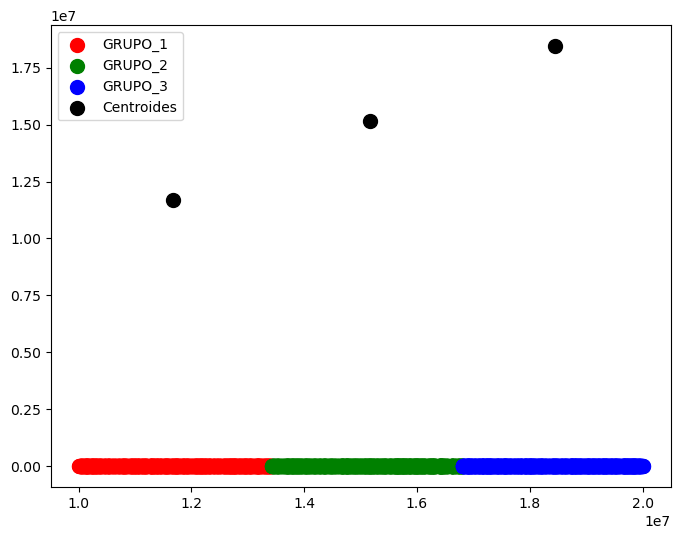

In [97]:
plt.figure(figsize = (8, 6))

plt.scatter(df_creatinina_sem_nulos.values[y_creatinina == 0, 0], df_creatinina_sem_nulos.values[y_creatinina == 0, 1], s = 100, c = "red", label = "GRUPO_1")
plt.scatter(df_creatinina_sem_nulos.values[y_creatinina == 1, 0], df_creatinina_sem_nulos.values[y_creatinina == 1, 1], s = 100, c = "green", label = "GRUPO_2")
plt.scatter(df_creatinina_sem_nulos.values[y_creatinina == 2, 0], df_creatinina_sem_nulos.values[y_creatinina == 2, 1], s = 100, c = "blue", label = "GRUPO_3")

plt.scatter(centros_creatinina[:, 0], centros_creatinina[:, 0], s = 100, c = "black", label = "Centroides")

plt.legend()
plt.show()

#### Testando com outras quantidades de centroides

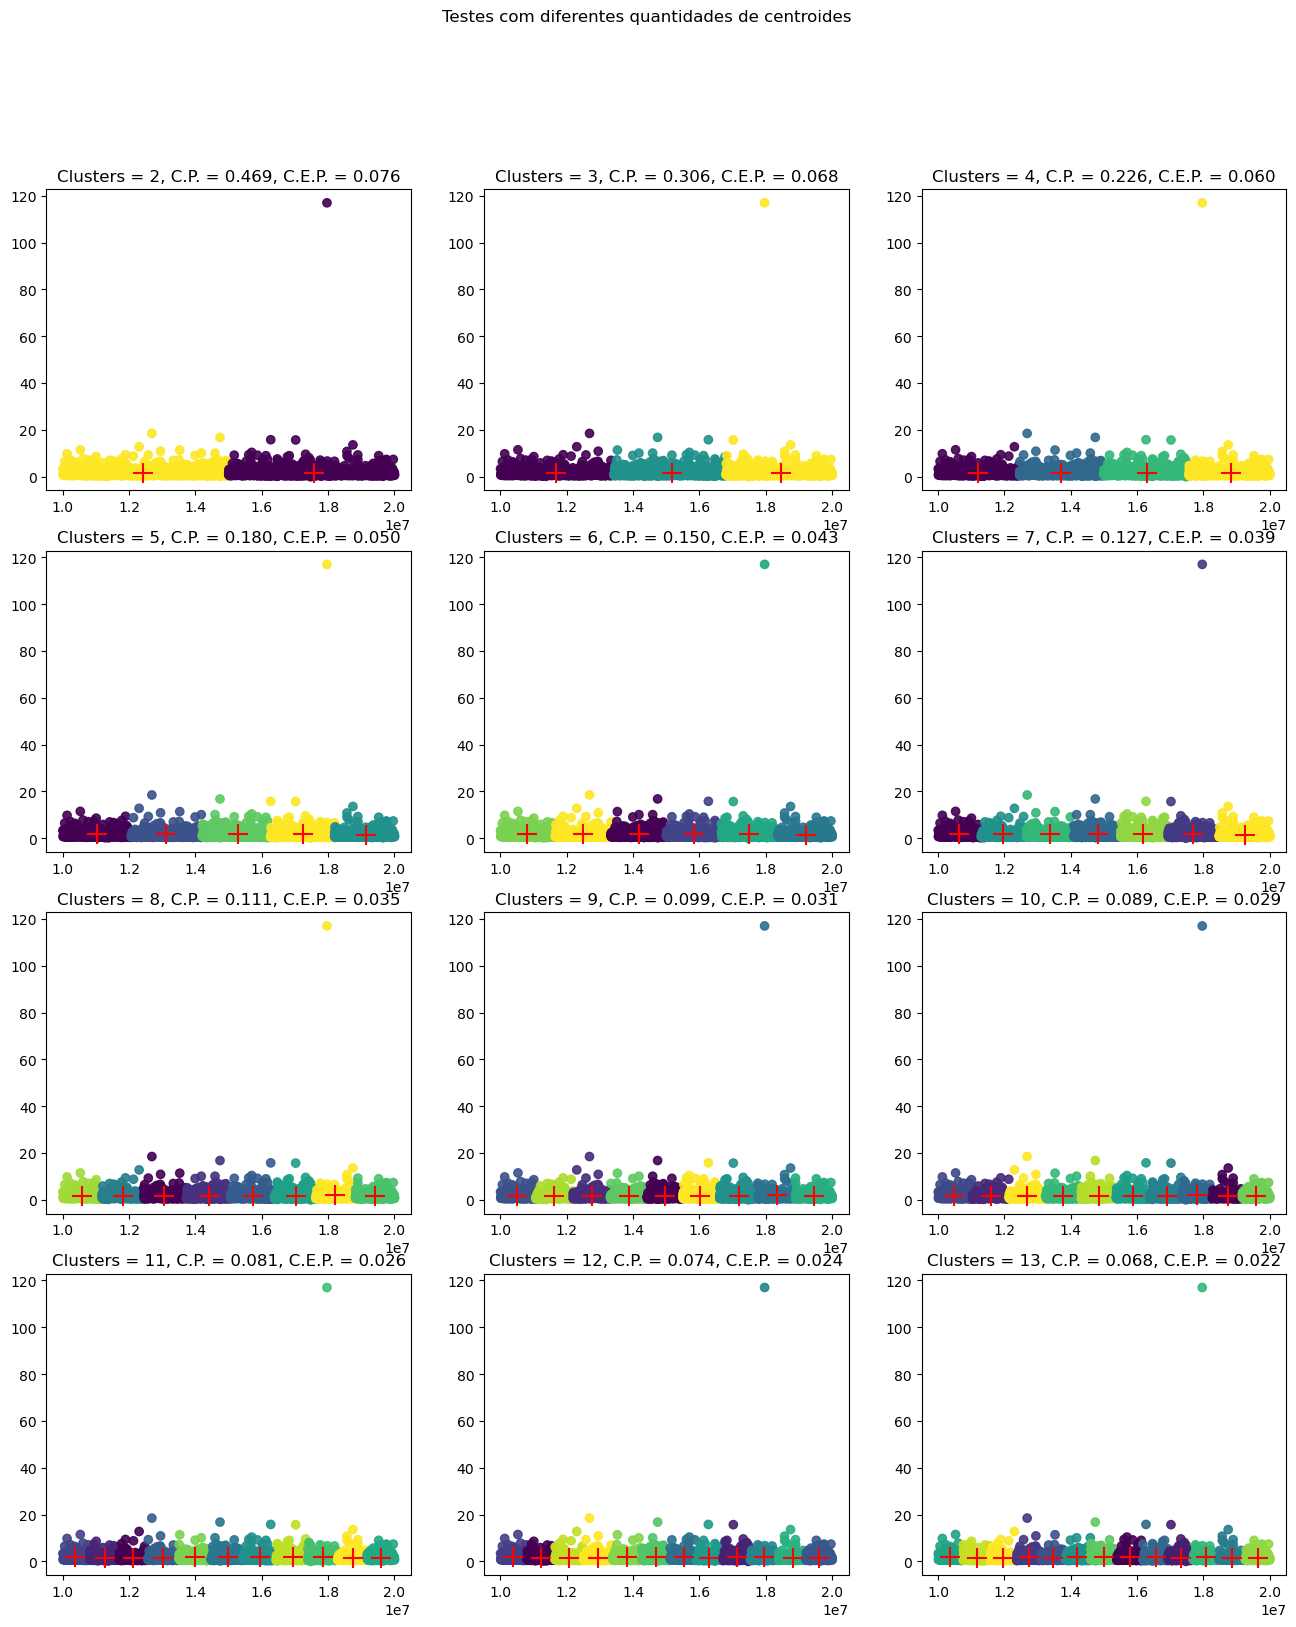

In [98]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "euclidean",
                  m = 1.5)
    fcmeans.fit(df_creatinina_sem_nulos.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_creatinina_sem_nulos.values)
    
    eixo.scatter(df_creatinina_sem_nulos.values[:,0], df_creatinina_sem_nulos.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()